In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Cars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### Checking for Correlation between indepentdent variables (Multicollinearity)

In [3]:
#Data visualization

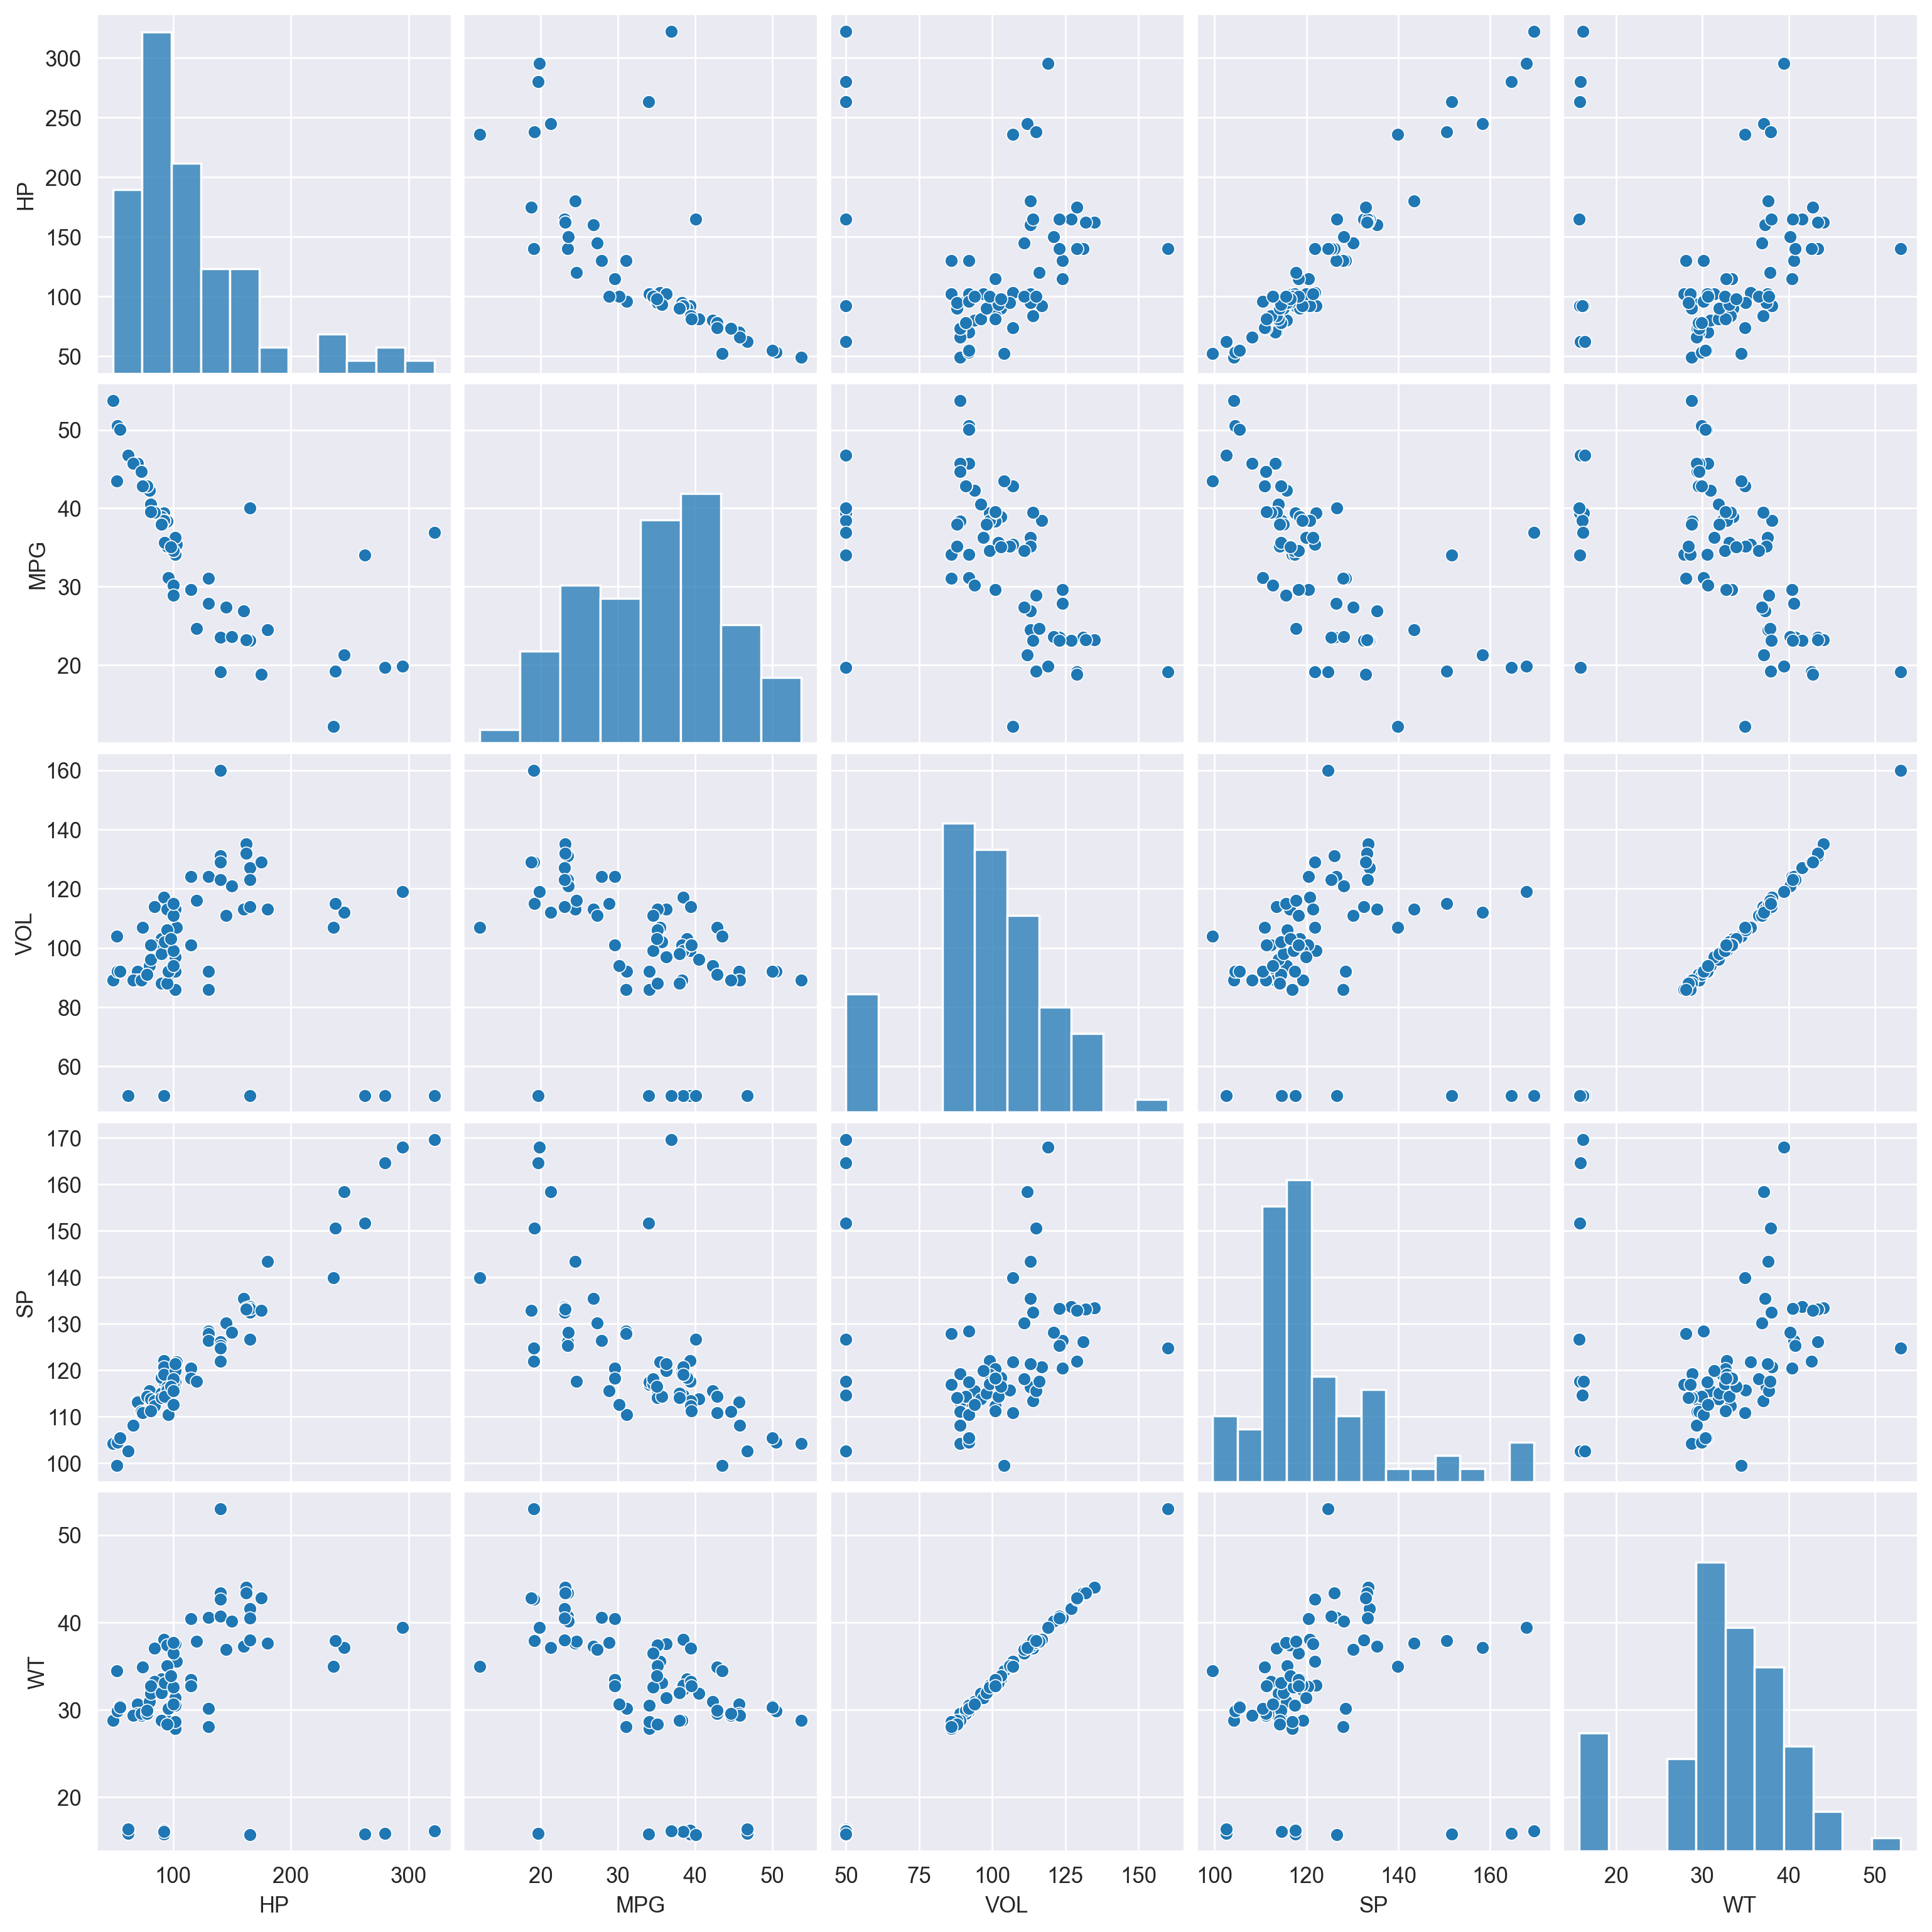

In [4]:
sns.pairplot(df)

In [5]:
# As we can see VOL and WEIGHT (WT) correletion is high

In [6]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


![](corrlevel.png)

<Axes: >

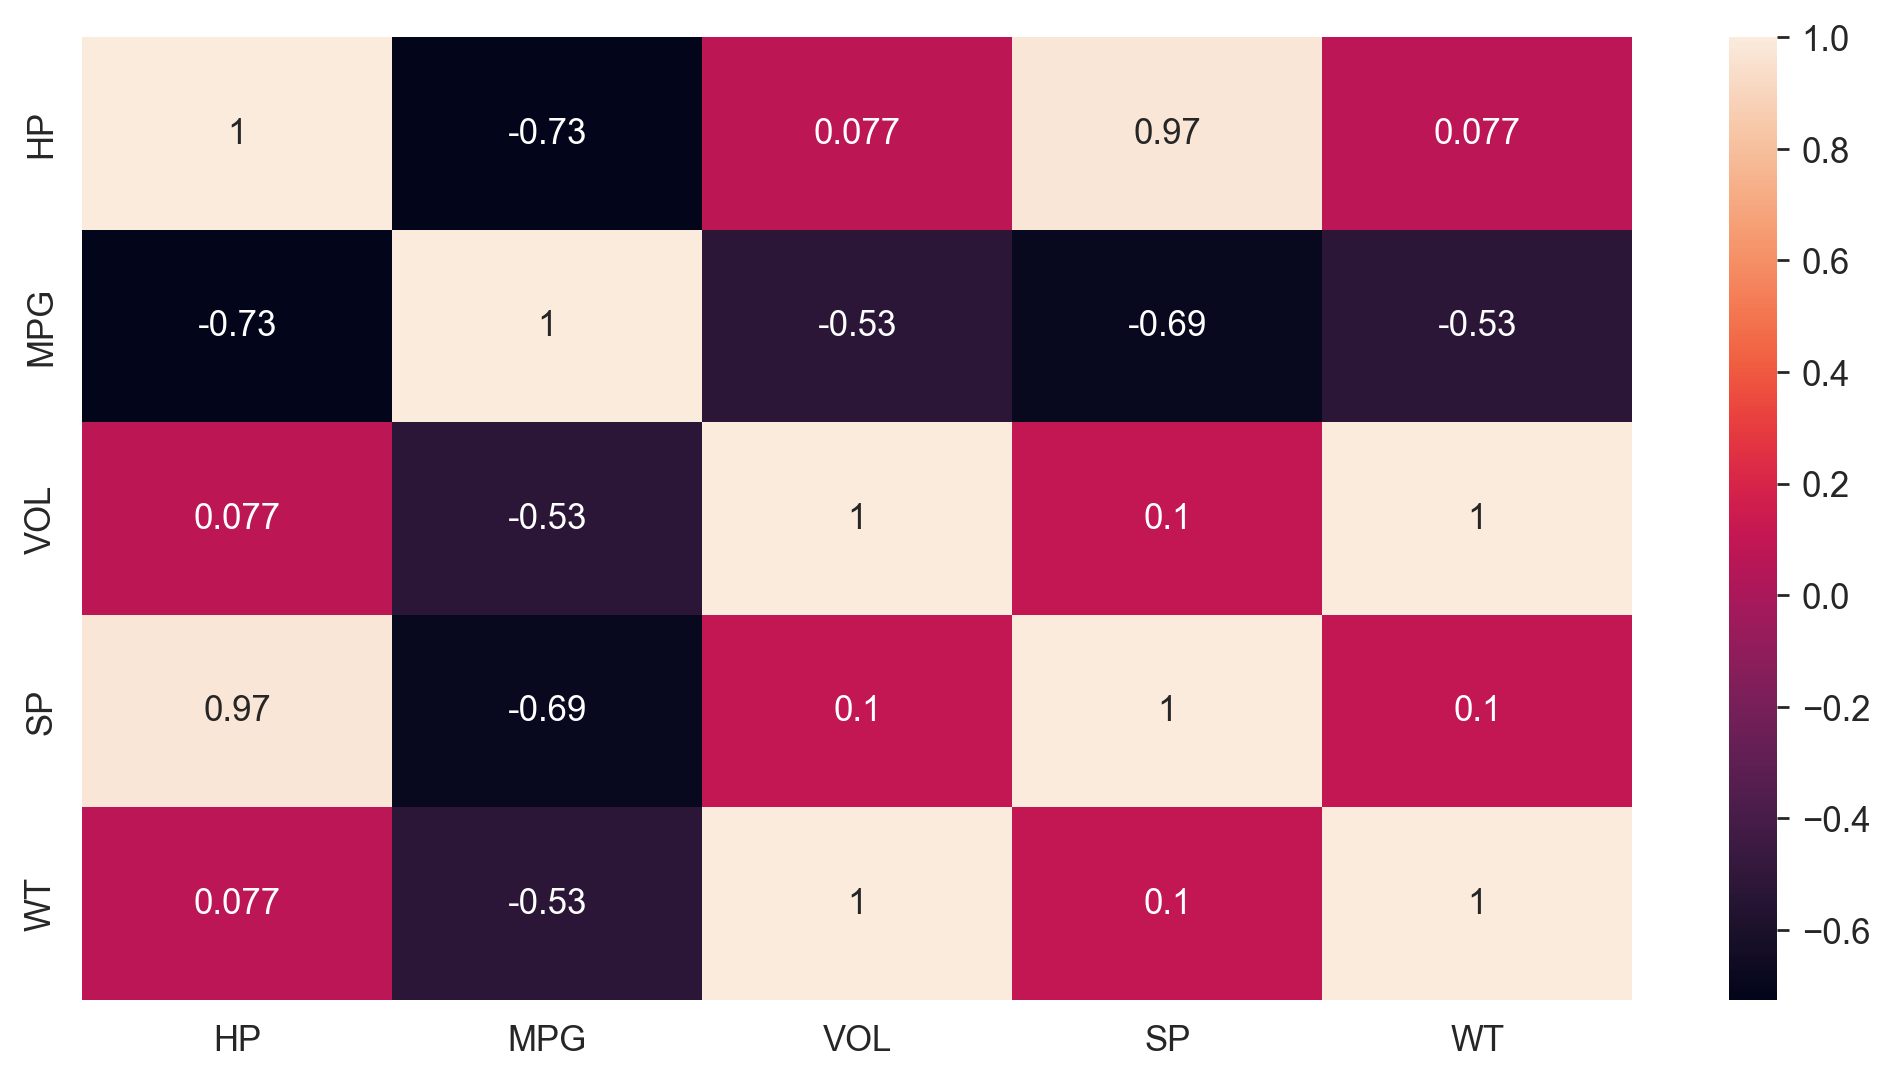

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
# As we can see VOL and WEIGHT (WT) have Very Stong Positive correletion 

#### Why should independent features should not have high correlation


High correlation between independent features (also known as predictors or input variables) in a dataset can lead to several issues:

1. **Redundancy and Multicollinearity:** When independent features are highly correlated, they might contain similar information. This redundancy can lead to multicollinearity issues in regression analysis. Multicollinearity makes it challenging to estimate the individual effects of predictors accurately, and it can inflate the standard errors of the coefficients, making the model less reliable.

2. **Model Interpretability:** High correlation among independent features can make it difficult to interpret the model. It becomes unclear which feature is contributing what unique information to the prediction, leading to potential misinterpretation of the model's significance.

3. **Overfitting:** In machine learning models, having highly correlated features might cause overfitting. Overfitting occurs when a model learns not only the signal but also the noise in the training data. This can lead to poor generalization performance when the model is applied to new, unseen data.

4. **Computational Inefficiency:** Models with highly correlated features might require more computational resources and time for training, especially in algorithms that involve matrix inversion or are sensitive to multicollinearity.

To address high correlation between independent features:

- **Feature Selection:** Consider selecting a subset of features that are most relevant for predicting the target variable and have lower intercorrelation.
  
- **Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) can be used to reduce the number of features while preserving most of the variability in the data.
  
- **Regularization Techniques:** Methods such as Lasso or Ridge regression introduce penalties to the model that can effectively reduce the impact of correlated features.

Overall, minimizing high correlation between independent features helps in building more robust, interpretable, and efficient models that generalize well to new data.

### Model Building

In [9]:
import statsmodels.formula.api as smf

In [10]:
# We are building a model by taking every variable even though VOL and WT are correalted to each just to check the difference

In [11]:
testmodel = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [12]:
testmodel.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [13]:
testmodel.rsquared

0.7705372737359844

In [14]:
testmodel.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

![](pval.png)

![](slope.gif) ![](zero.png)

- In the above p value for WT = 0.813649 and VOL = 0.556294
- For Linear Regression the Hypothesis Test is 
H0 is m = 0 and HA is m != 0 (m = slope) and alpha = 0.5
- p for WT is 0.813649, p > alpha which means Accept Null Hypothesis (H0) whis is m = 0
- p for VOL is 0.556294, p > alpha which means Accept Null Hypothesis (H0) whis is m = 0
- When the slope of a regression line is equal to 0, it implies that there is no linear relationship between the independent variable and the dependent variable
- Which is incorrect for our data set as proven by the scatter plot, m = 0 is happening because of the Multicollinearity between VOL and WT


In [15]:
# Model Building only using the WT not VOL
model_wt = smf.ols('MPG~HP+SP+WT',data=df).fit()

In [16]:
model_wt.pvalues

Intercept    5.053995e-02
HP           7.560276e-07
SP           1.089096e-02
WT           1.914892e-13
dtype: float64

As we can see the P value for WT is 1.914892e-13 which is approx 0, 

p < alpha, reject the null hypothesis, which means m != 0 

In [17]:
# Model Building only using the VOL not WT
model_vol = smf.ols('MPG~HP+VOL+SP',data=df).fit()

In [18]:
model_vol.pvalues

Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64

As we can see the P value for VOL is 1.648229e-13 which is approx 0, 

p < alpha, reject the null hypothesis, which means m != 0 

If the slope (m
​
 ) in a linear regression model is not equal to zero, it signifies that there is a linear relationship between the independent variable(s) and the dependent variable.

### Calculate VIF

VIF stands for **Variance Inflation Factor**. It's a measure used to assess multicollinearity in regression analysis. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can pose challenges in interpreting the model coefficients and affect the reliability of the model's predictions.

The VIF measures how much the variance of the estimated regression coefficients is inflated due to multicollinearity. Specifically, for each independent variable in a regression model, the VIF is calculated by regressing that variable against all other independent variables. The VIF for a particular variable is obtained by taking the reciprocal of the tolerance.



![](vifformula.png)



Key points about VIF:

1. **Interpretation:** A VIF of 1 indicates no multicollinearity, while values greater than 1 suggest increasing levels of multicollinearity. Typically, a VIF above 5 or 10 is considered indicative of significant multicollinearity, though specific thresholds may vary depending on the context and field of study.

2. **Impact:** High VIF values indicate that the variance of the estimated regression coefficients is significantly inflated, making the estimates less reliable and stable. It becomes difficult to discern the individual effects of correlated predictors on the dependent variable.

3. **Remedies:** To address multicollinearity detected by high VIF values, options include removing one or more of the highly correlated variables, combining correlated variables, or using regularization techniques such as Ridge regression that can mitigate multicollinearity.

In summary, VIF is a diagnostic tool used to identify multicollinearity by measuring the degree of correlation between independent variables in a regression model. Identifying and addressing multicollinearity helps improve the reliability and interpretability of the regression analysis results.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [21]:
# For vif we don't need Target Column 

In [22]:
data = df.drop(columns=["MPG"])
data.head()

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149


In [23]:
#variance_inflation_factor accept only array datatype

In [24]:
type(data) # data is a DataFrame

pandas.core.frame.DataFrame

In [25]:
data.values # changed the dataframe to array

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [26]:
vif = pd.DataFrame()
vif

""


In [27]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [28]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [29]:
vif["VIF_Values"]= [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

This line of code computes the Variance Inflation Factor (VIF) for each feature or independent variable in a dataset. VIF measures the severity of multicollinearity (the high correlation between predictor variables) in a regression analysis.

Let's break down the code:

```python
vif["VIF_Values"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
```

- `vif` is likely a DataFrame or a data structure where VIF values will be stored.
- `data` is a DataFrame or a dataset containing the independent variables used in a regression analysis.
- `variance_inflation_factor` is a function (from a library like statsmodels) used to compute the VIF for a given set of variables.
- `data.values` refers to the values in the DataFrame `data`.
- `len(data.columns)` gives the number of columns (features or independent variables) in the dataset.

This line of code iterates over each column (feature) in the `data` DataFrame using a `for` loop with `range(len(data.columns))`. For each column index `i`, it calculates the VIF using the `variance_inflation_factor` function and assigns the resulting VIF value to the `VIF_Values` column in the `vif` DataFrame.

The resulting `vif` DataFrame will have a new column named `'VIF_Values'` containing the VIF values calculated for each independent variable in the dataset. These VIF values help assess the degree of multicollinearity between the variables, where higher VIF values typically indicate stronger multicollinearity. High VIF values may suggest that certain variables might be redundant or highly correlated with others, potentially affecting the stability and reliability of a regression model.

In [30]:
vif

,Features,VIF_Values
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


#### Subset Selection
- For AIC: Lower values are preferred because they indicate a more parsimonious yet effective model.
- 
For R-squared: Higher values are preferred because they indicate a better fit of the model to the data.

In [31]:
#wt model
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared, wt.aic

(0.7694828139983461, 476.2992750152976)

In [32]:
#vol model
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.rsquared, vol.aic

(0.770368341321302, 475.9875158854609)

The Akaike Information Criterion (AIC) is a measure used to compare different models. It helps in choosing the best model among several options by considering both how well the model fits the data and how complex the model is.

Here's a simpler explanation:

1. AIC balances model goodness (how well it fits the data) with simplicity (how complex the model is).
2. Lower AIC values are better. They suggest a model that fits the data well without being too complicated.
3. It's a way to compare different models: the model with the lowest AIC among the choices is often the preferred one because it finds a good balance between accuracy and simplicity.

#### MODEL VALIDATION TECHNIQUES
1.Residual Analysis
As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.

NORMALITY TEST

In [33]:
model = smf.ols('MPG~HP+VOL+SP', data = df).fit()
model.rsquared

0.770368341321302

In [34]:
#Statsmodel
import statsmodels.api as sm

In [35]:
df.head()
#MPG have a Actual Value

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [36]:
# Here are a pridicted value 
model.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [37]:
# For 0th index value, MPG = 53.700681 and 0th index value of Pridicted value is 43.590769

In [38]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

In [39]:
# model.resid = actucal value - Pridicted value

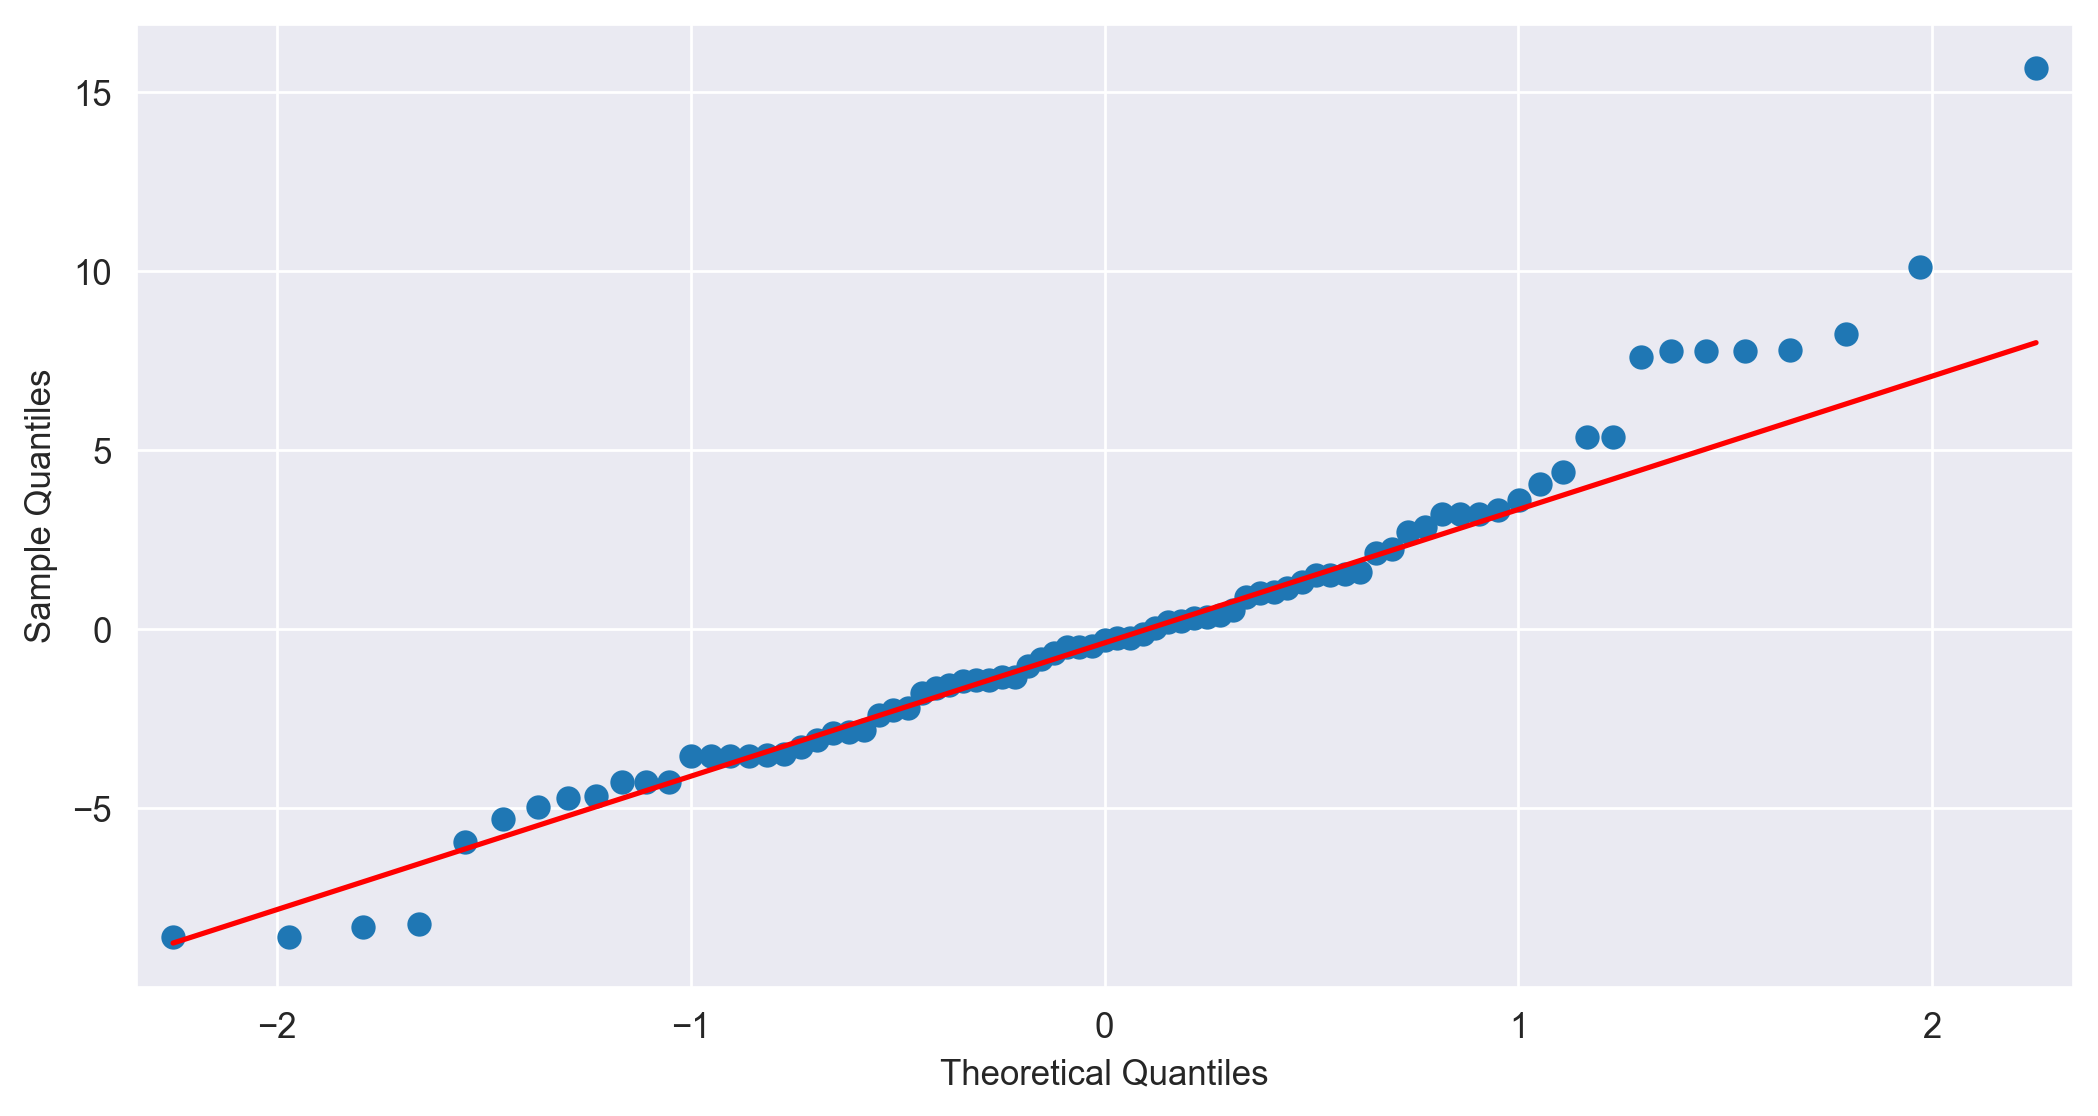

In [40]:
# Q-Q plot (put [;] is used for print one graph if we do not put [;] at the end it will print 2 same graph)
sm.qqplot(model.resid, line='q');

In [41]:
# get index for the higher residuals (error)
np.argmax(model.resid), np.max(model.resid)

(76, 15.666857402852102)

#### 2. Residual plot of Homoscedasticity
Homoscedasticity = In simpler terms, it means that the spread or dispersion (varience) of the residuals (Error) should be consistent along the range of predicted values.

In [42]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [43]:
model.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64

In [44]:
model.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [45]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

Text(0, 0.5, 'Errors')

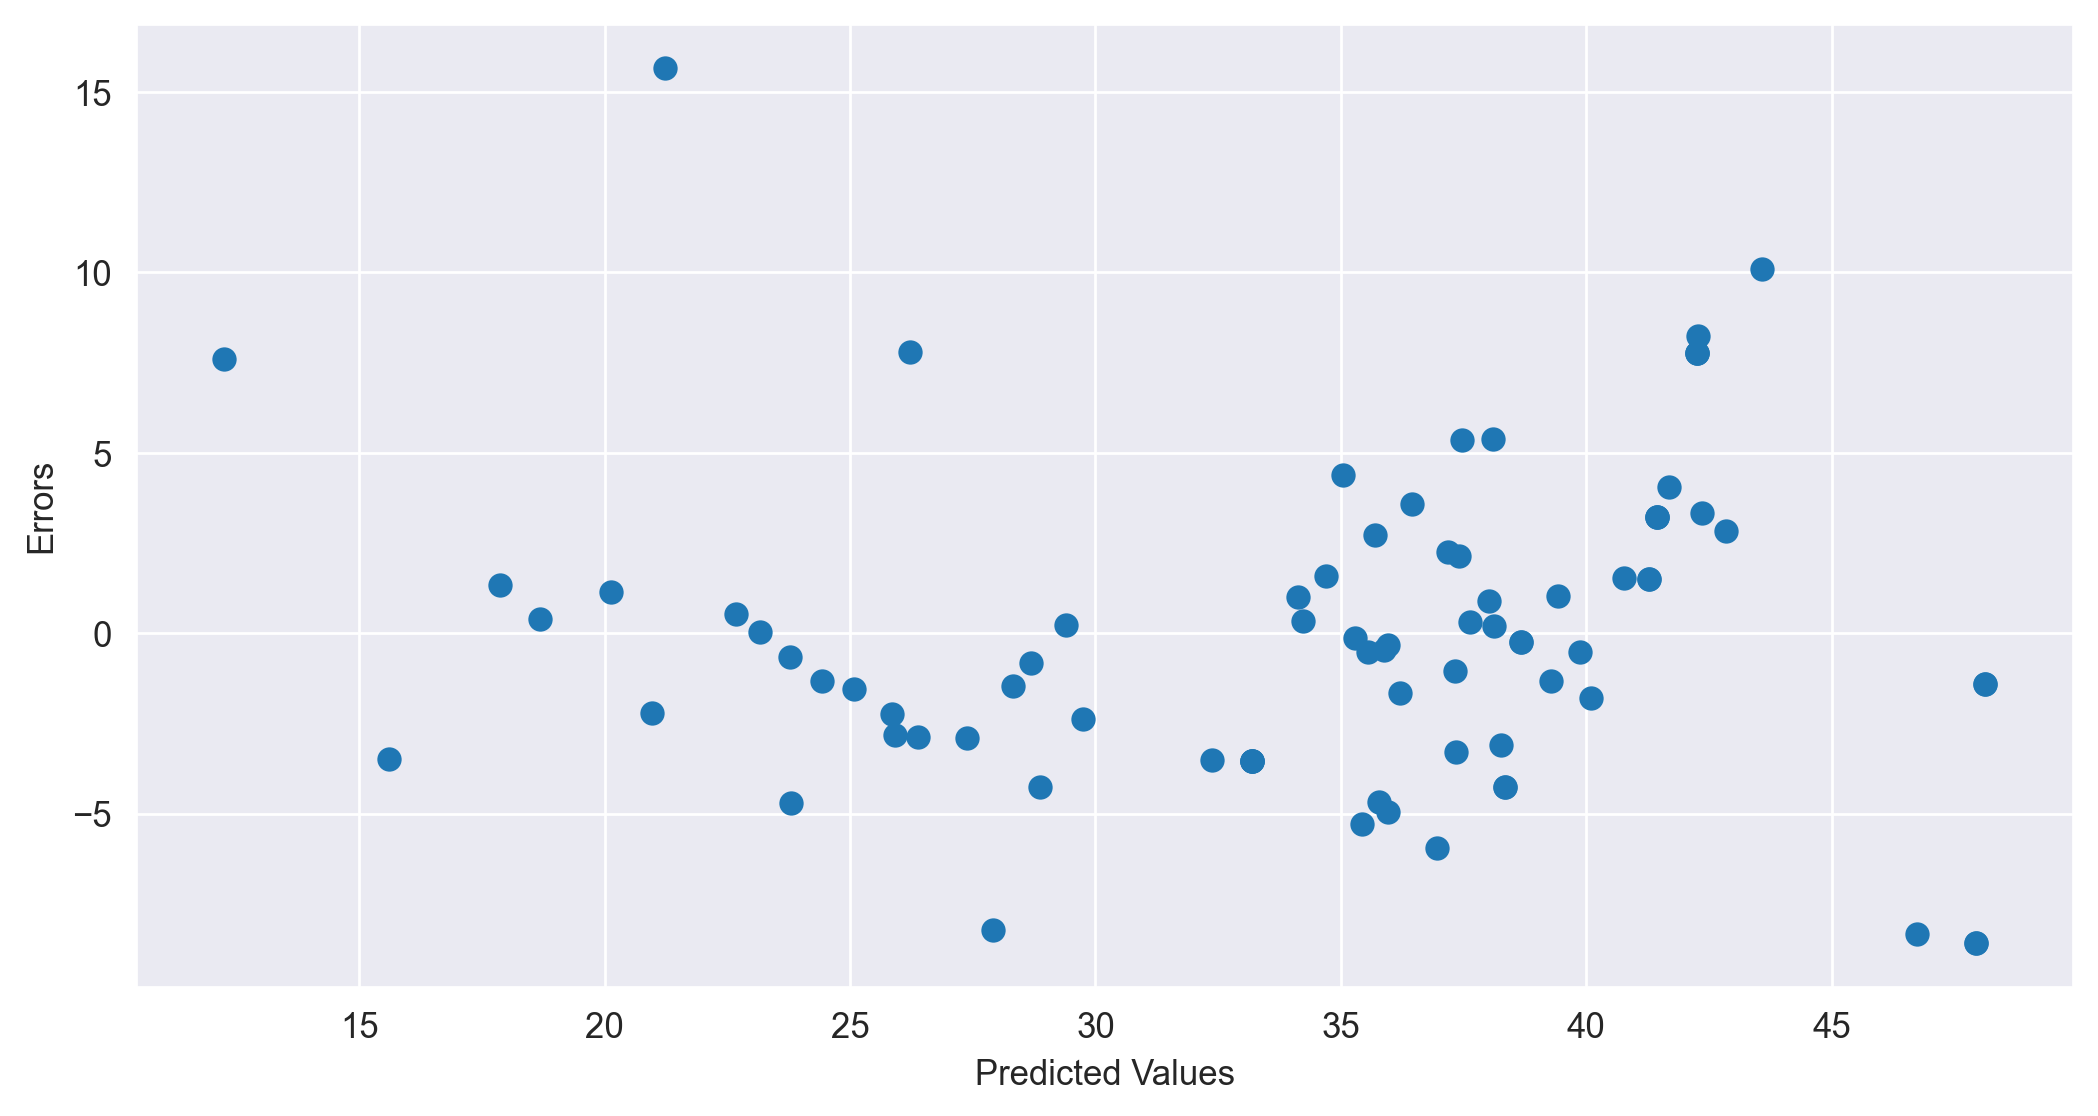

In [46]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

In [47]:
# U shape pattern is visiable meaning somjething is wrong with our model

#### 3.Residual VS Regressor


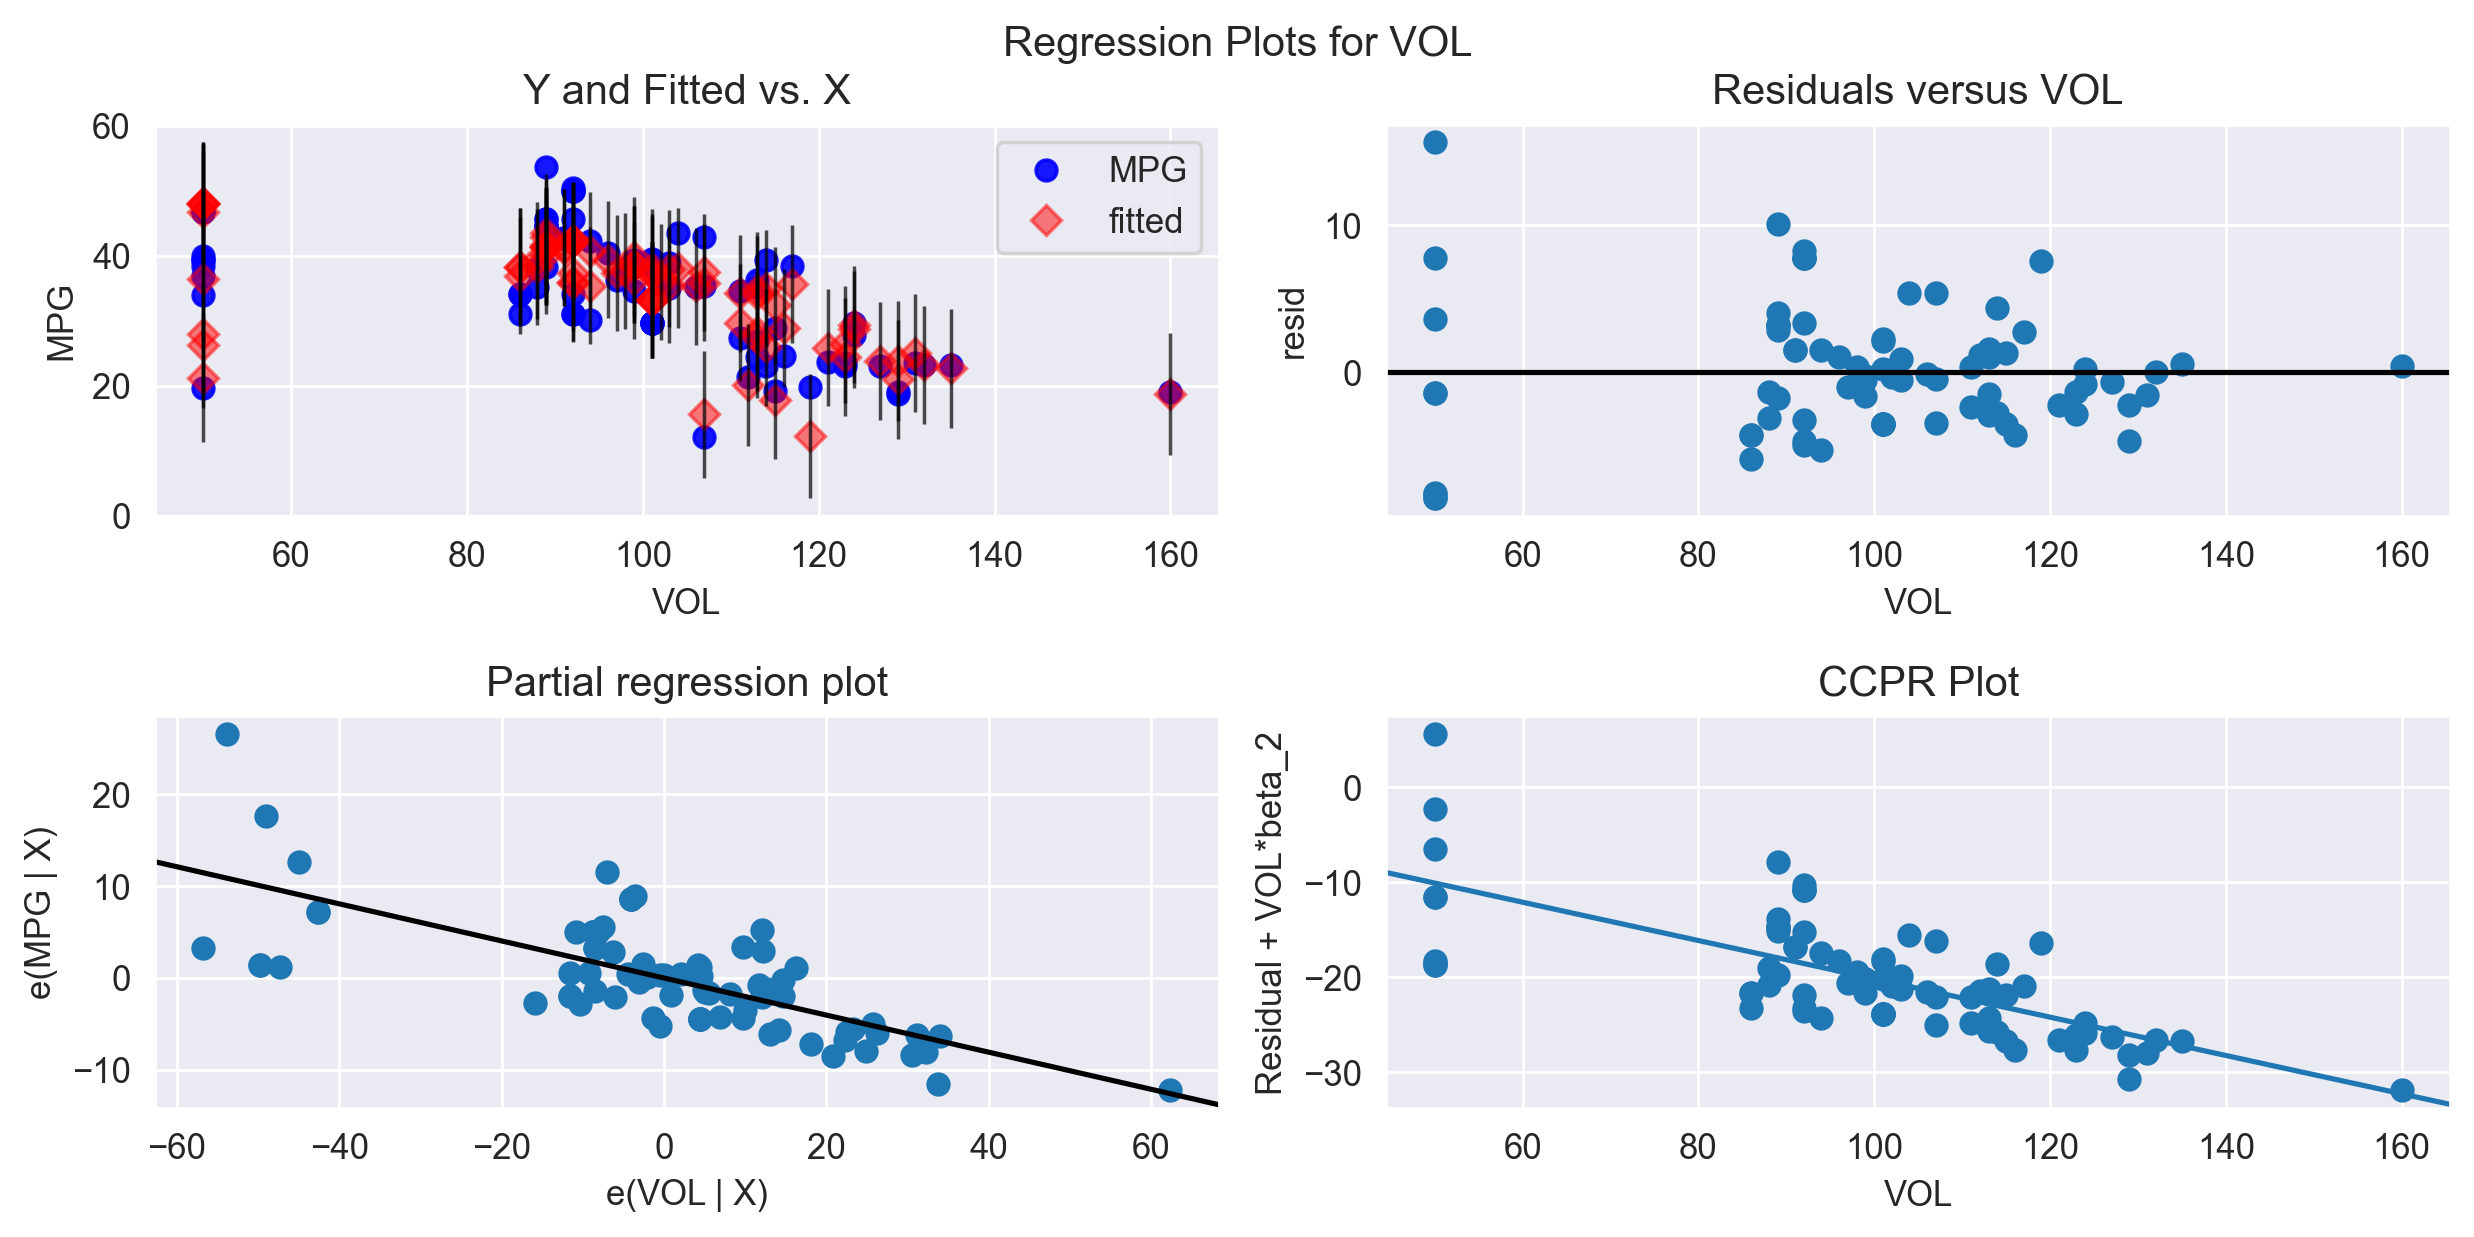

In [48]:
#Vol
sm.graphics.plot_regress_exog(model,'VOL');

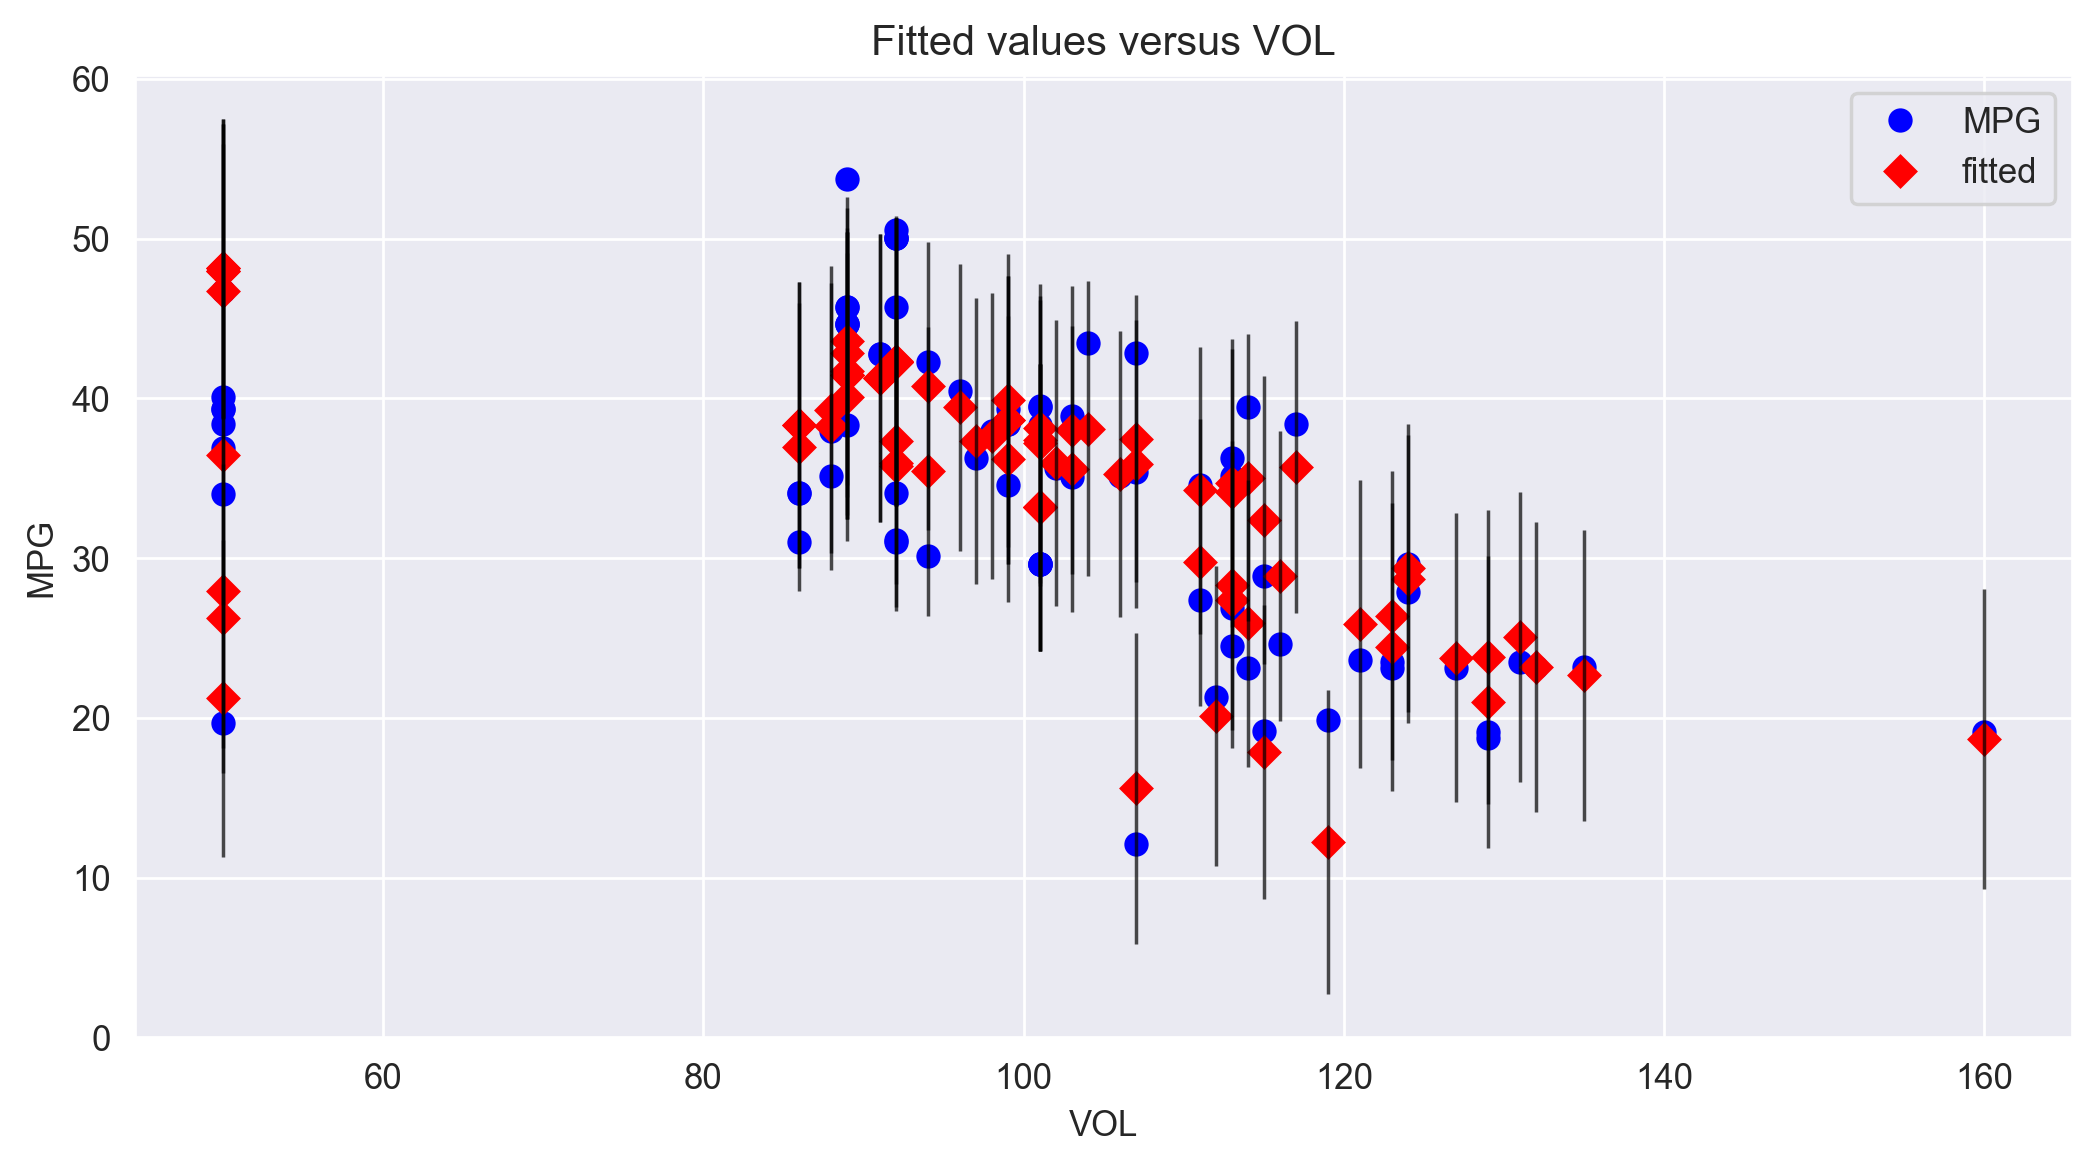

In [49]:
sm.graphics.plot_fit(model,'VOL');

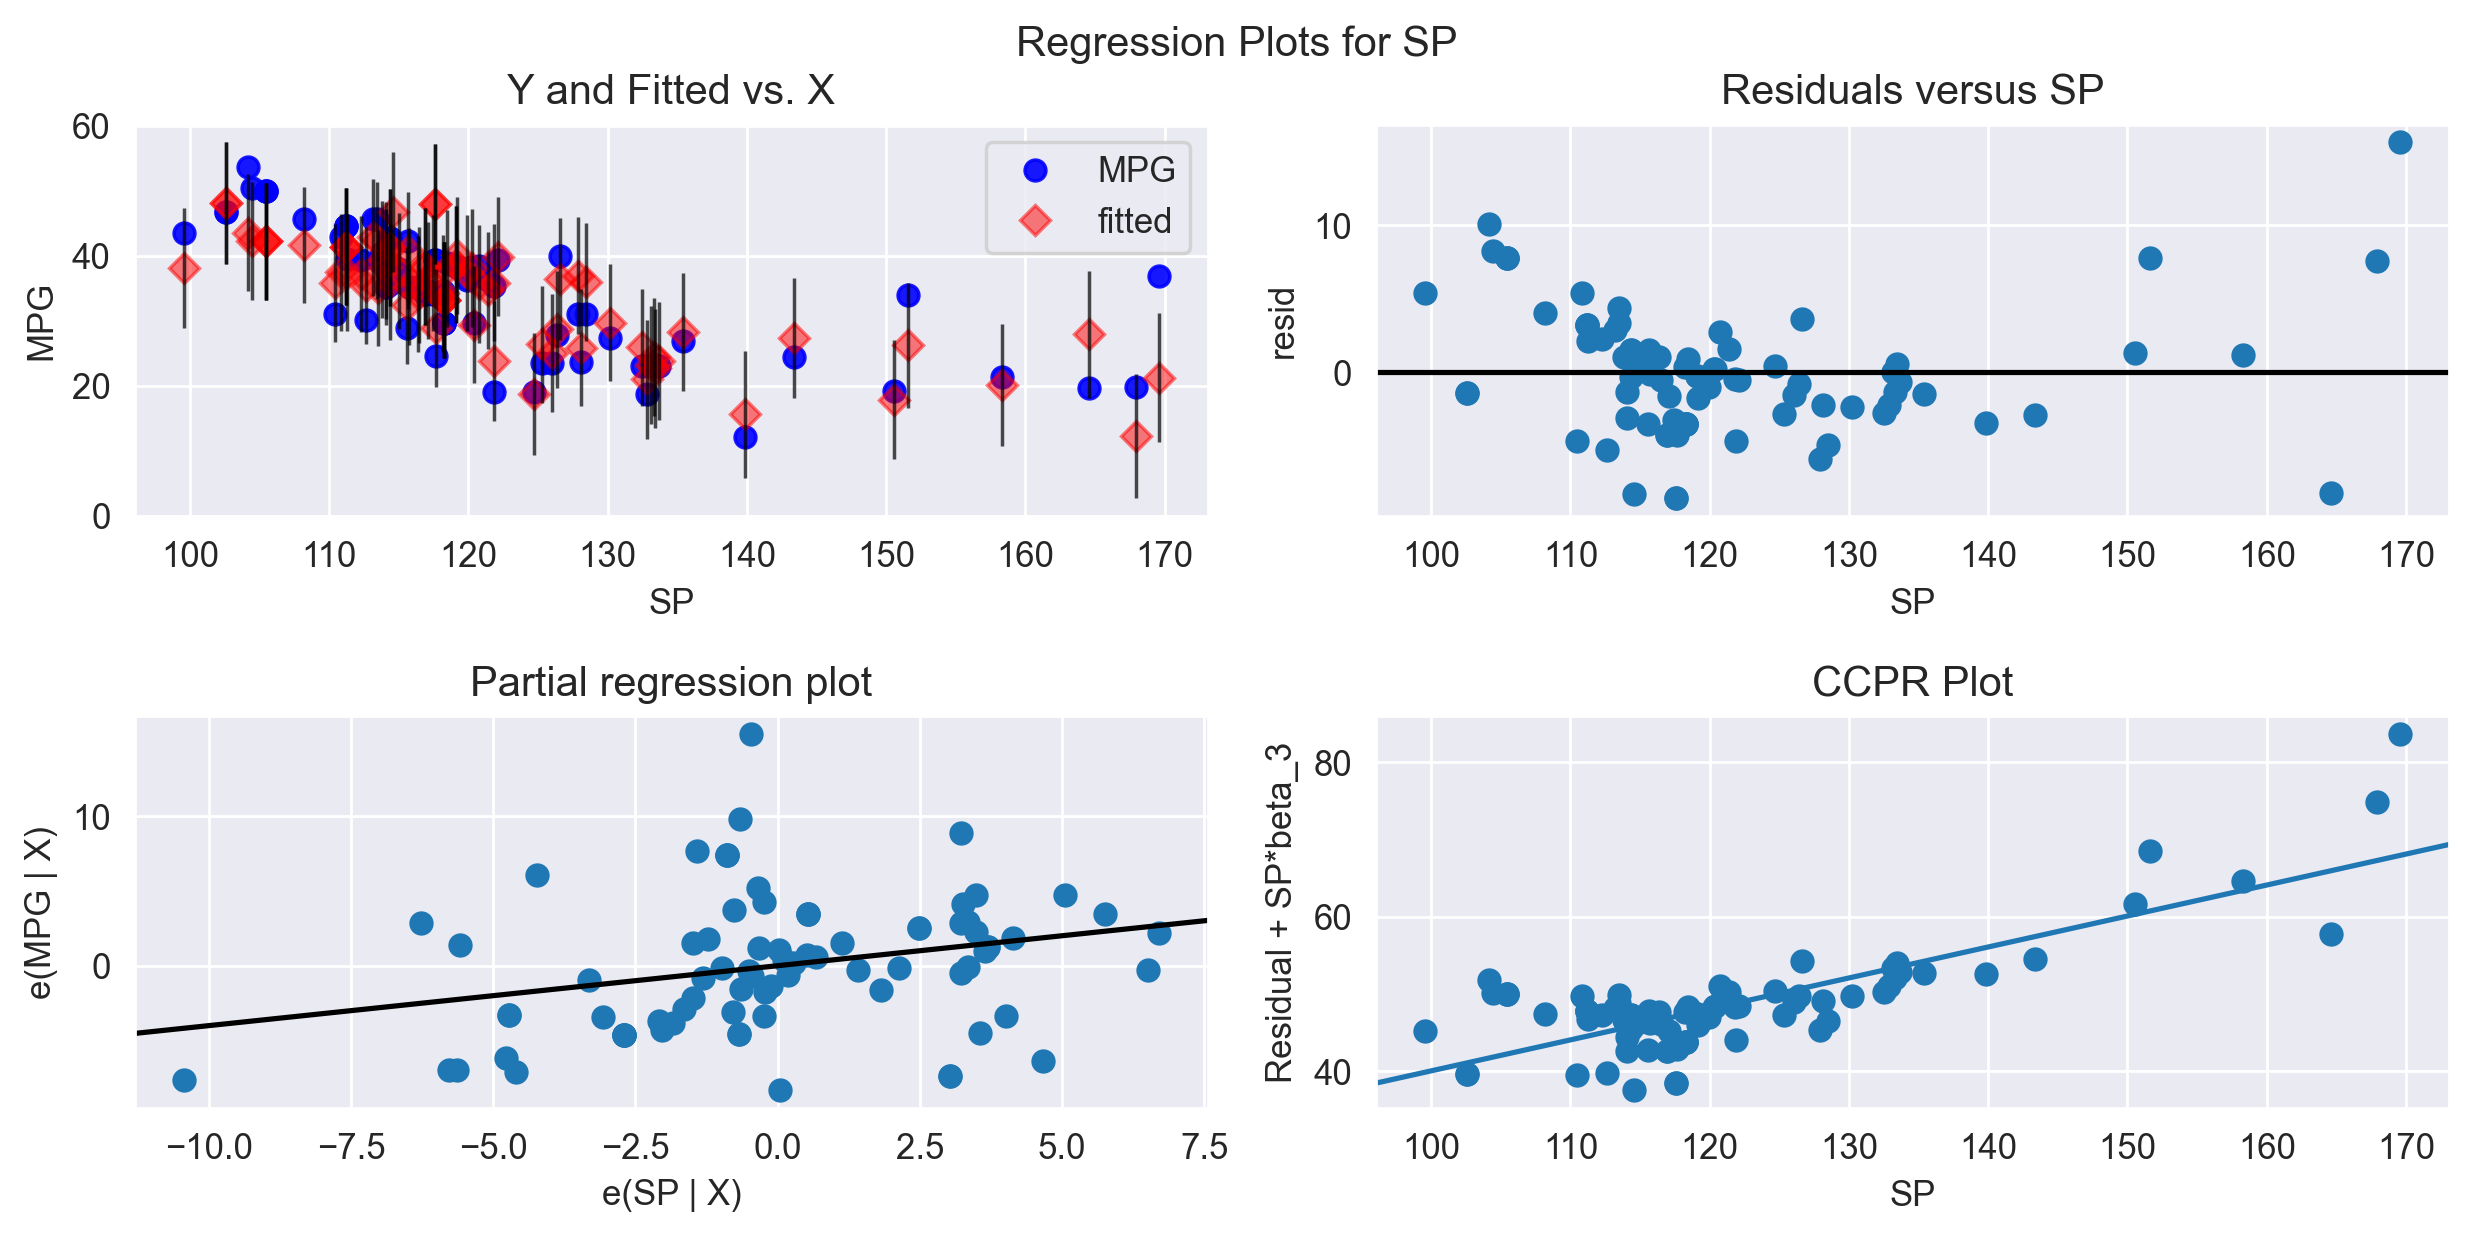

In [50]:
sm.graphics.plot_regress_exog(model,'SP');

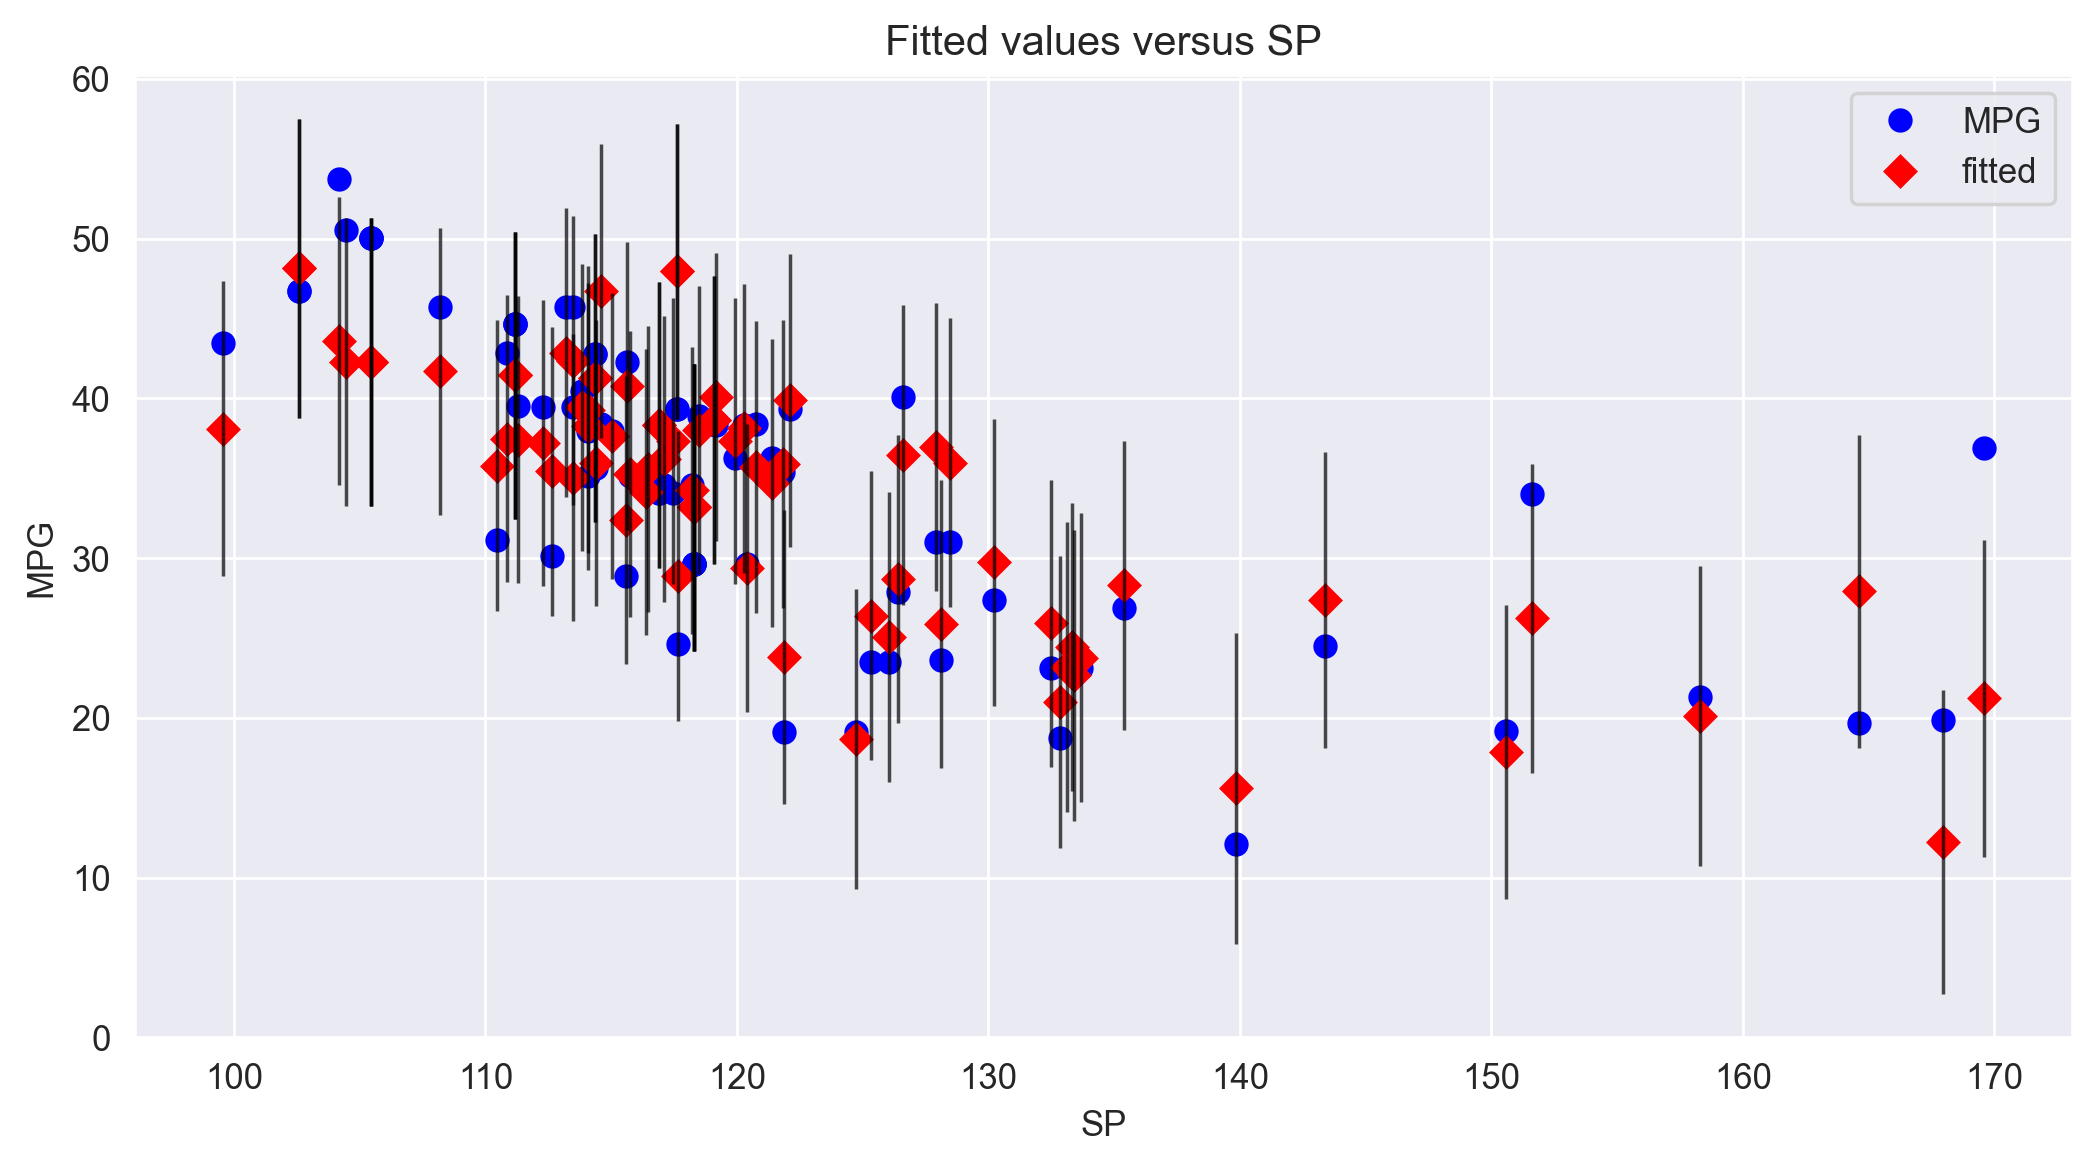

In [51]:
sm.graphics.plot_fit(model, 'SP');

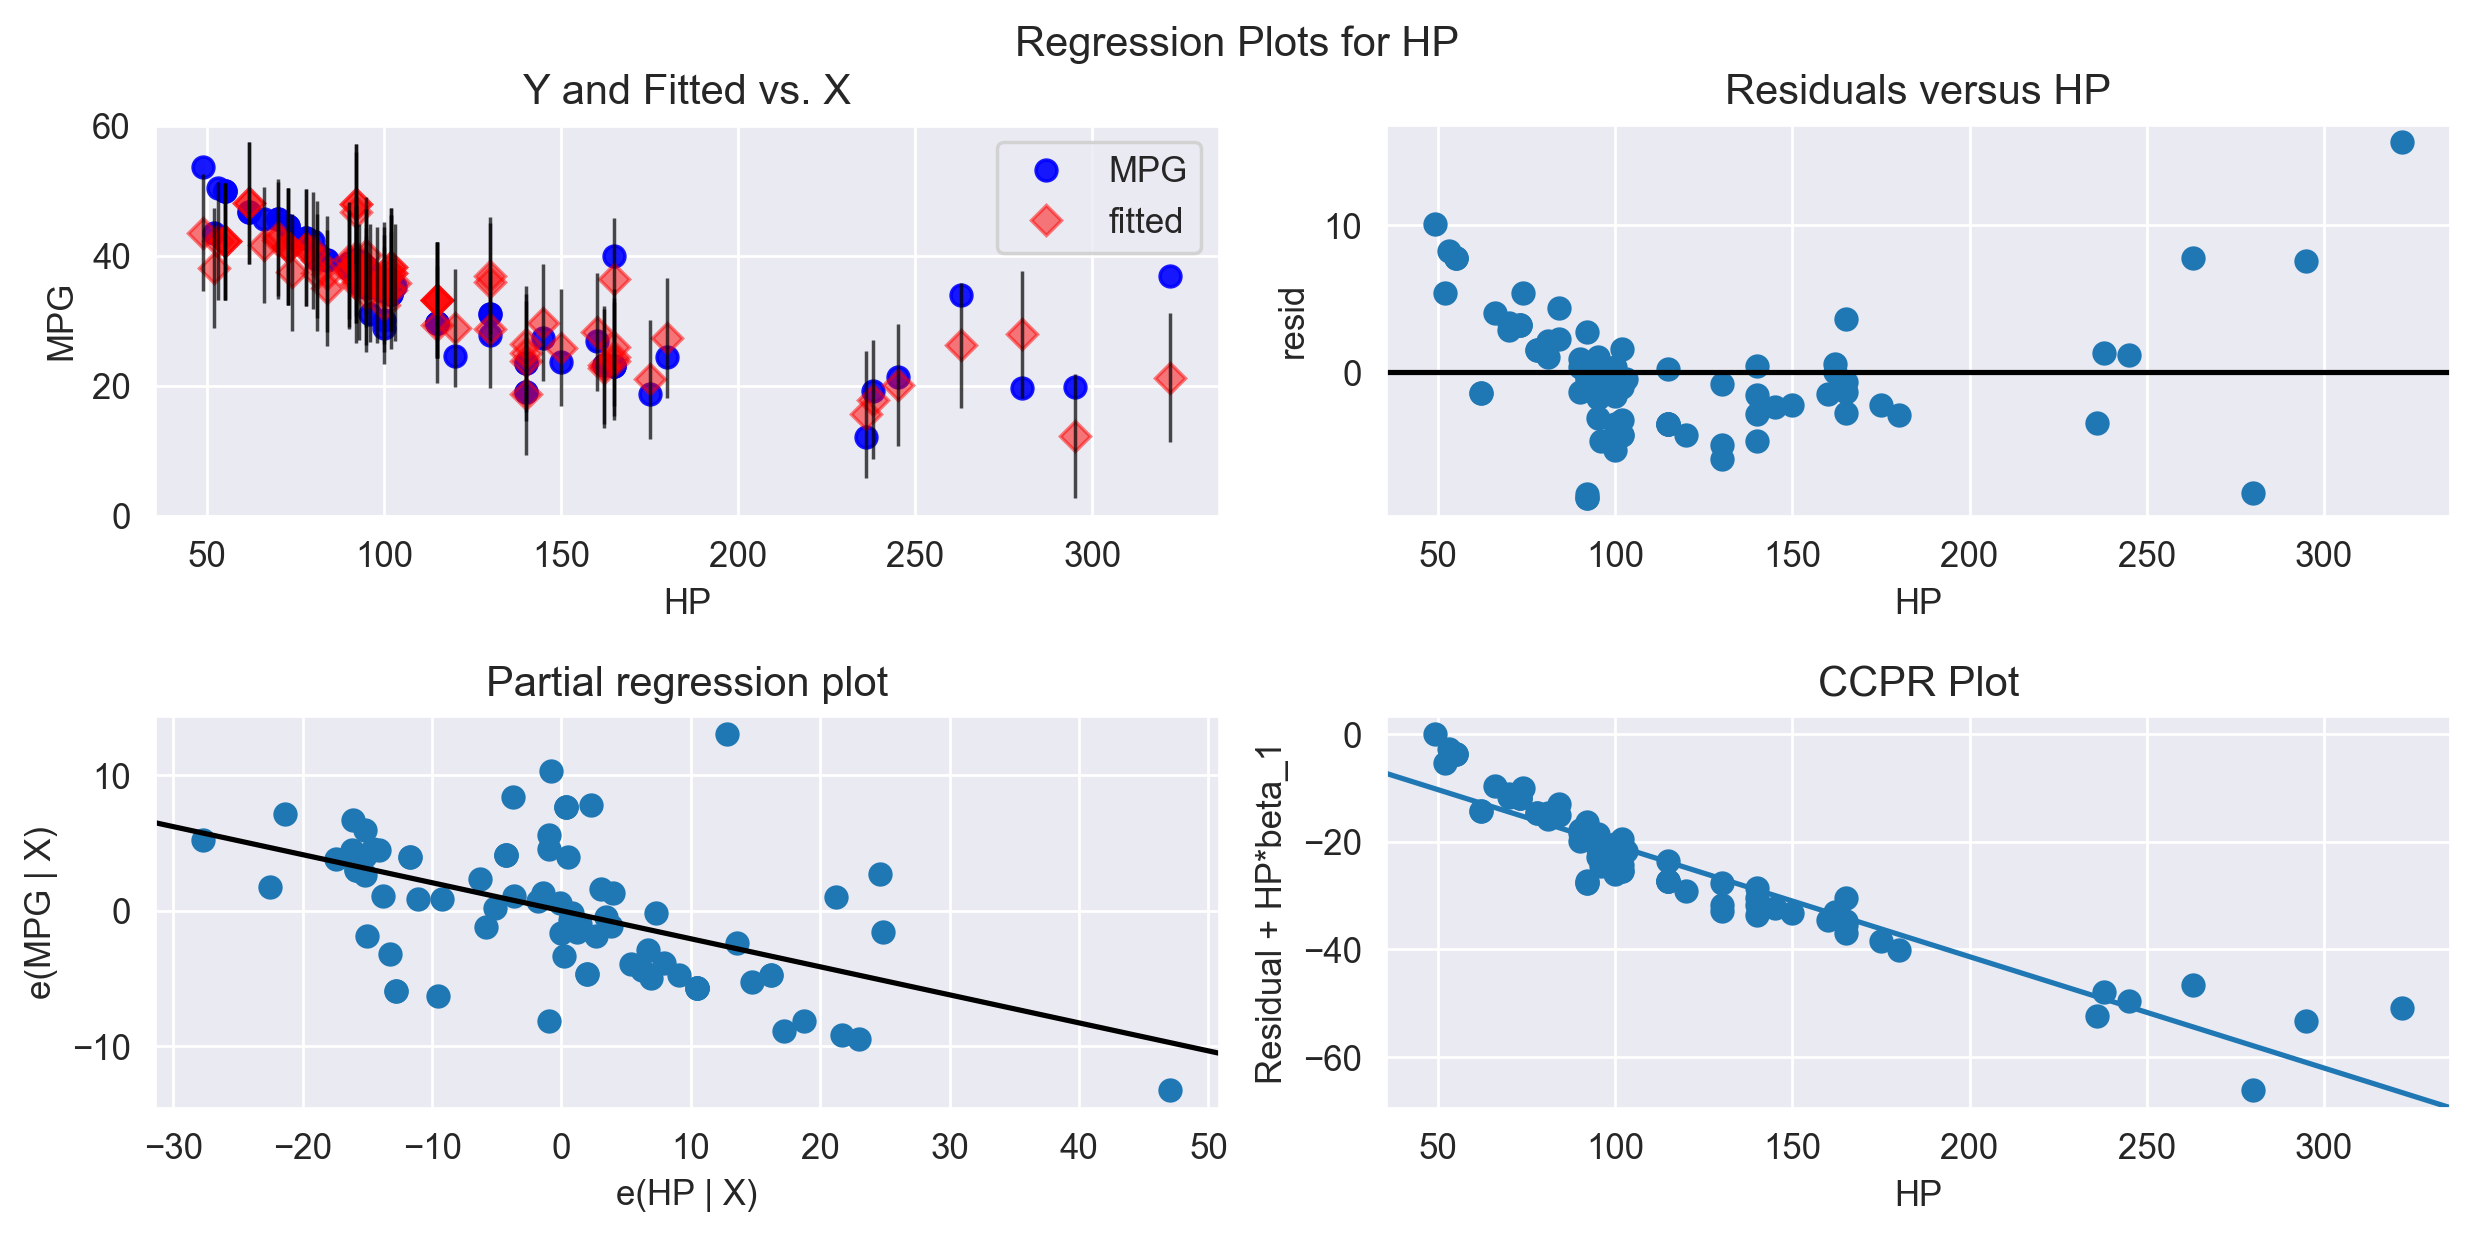

In [52]:
sm.graphics.plot_regress_exog(model, 'HP');

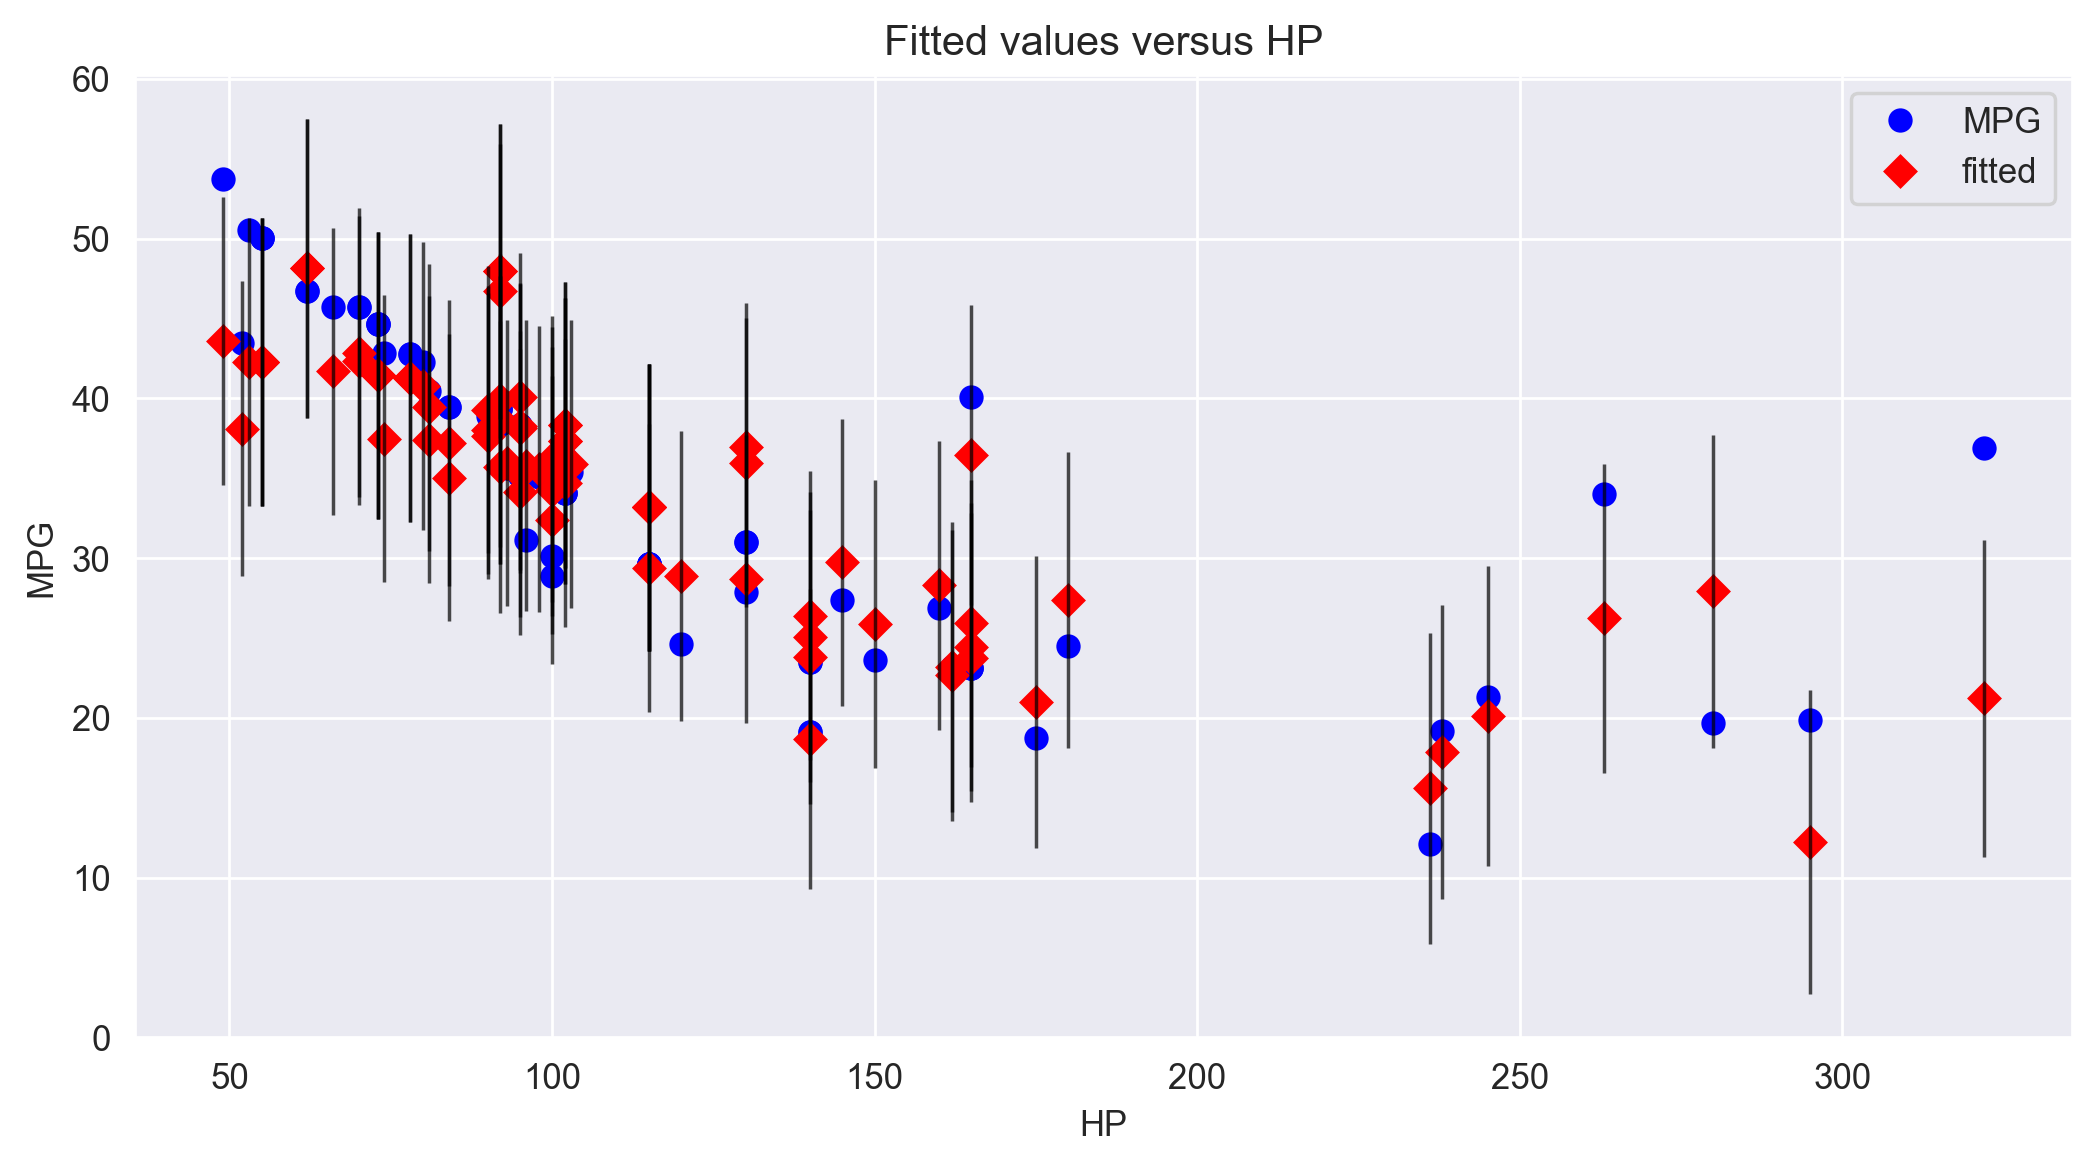

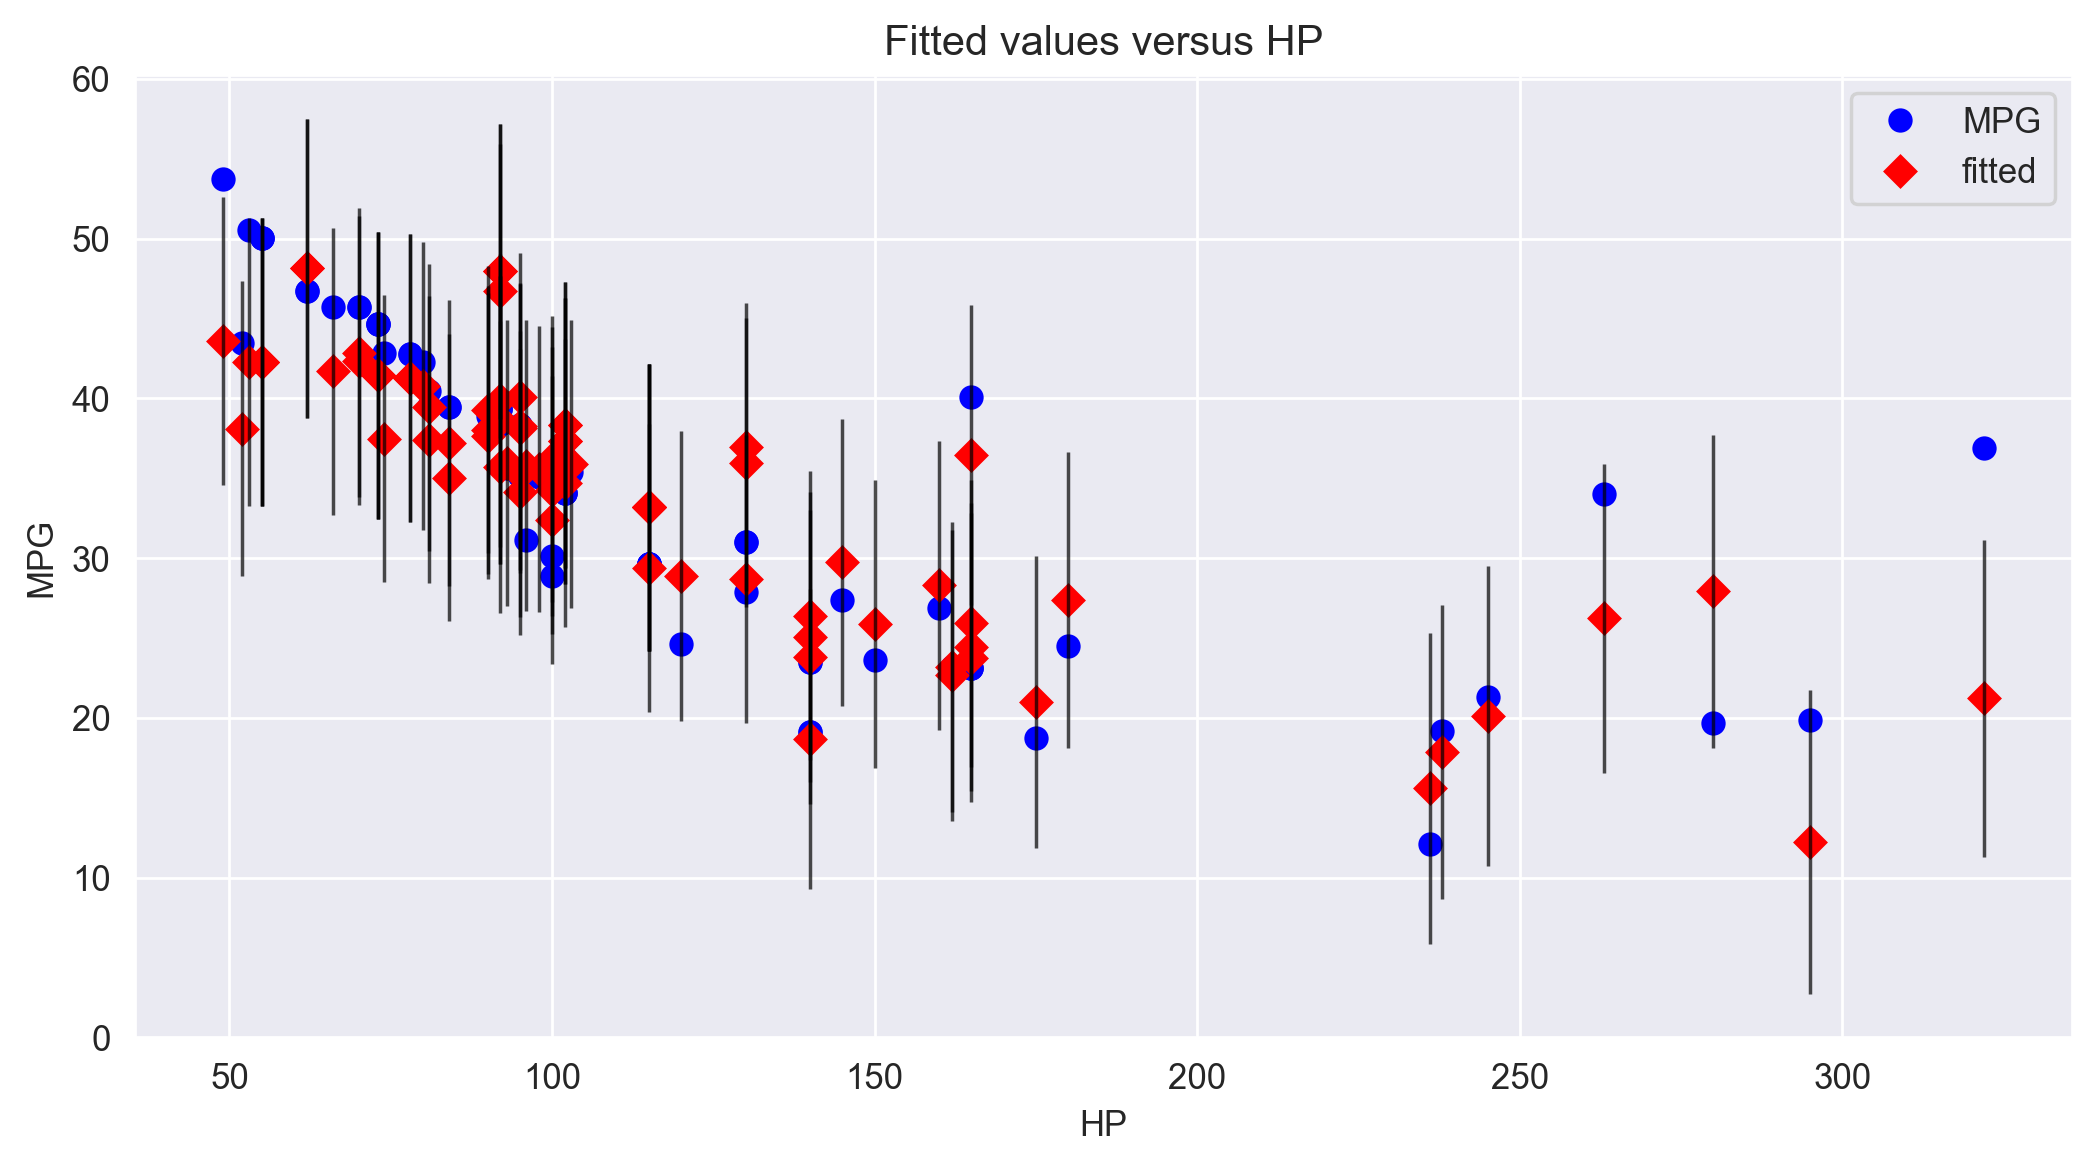

In [53]:
sm.graphics.plot_fit(model, 'HP')

In [54]:
# As we can see their is a Difference b/t Actual Value and Pridicted Value

### MODEL DELETION TECHNIQUES

#### Cook's Distance
- Detecting influencers and outliers

Imagine you have a bunch of data points and you're drawing a line or fitting a curve through them to understand their relationship (like a best-fit line in a scatterplot). Cook's distance helps to figure out which points have a lot of influence on that line or curve.

Here's how it works:

1. **Fit a model:** First, you create a model to represent the relationship between your variables. For instance, if you're predicting house prices based on square footage and location, your model might be a regression equation that uses these factors to estimate prices.

2. **Calculate predictions:** With the model, you predict the outcome (like house prices) for each data point.

3. **Measure influence:** Cook's distance measures how much the predictions change if you take out one data point at a time. For each point, it compares the predicted value with and without that point. If removing a particular point causes a big change in the predictions, it suggests that this point has a strong influence on the model.

4. **Identify influential points:** Cook's distance gives you a number for each data point. Larger values mean that removing that point would significantly change the model's predictions, indicating it's influential.

5. **Decision-making:** If a data point has a high Cook's distance, it might be worth investigating further. Sometimes these points are outliers or have unusual characteristics. However, decisions about whether to keep or remove these points should consider the context and not just rely solely on this measure.

In essence, Cook's distance helps to find out which data points might be impacting your overall analysis more than others, and it helps you decide if those points should be treated differently or if your model needs adjustments to better represent the data.matter knowledge.

In [55]:
model

In [56]:
#Find the Influence data
inf = model.get_influence()

In [57]:
c, p=inf.cooks_distance

In [58]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

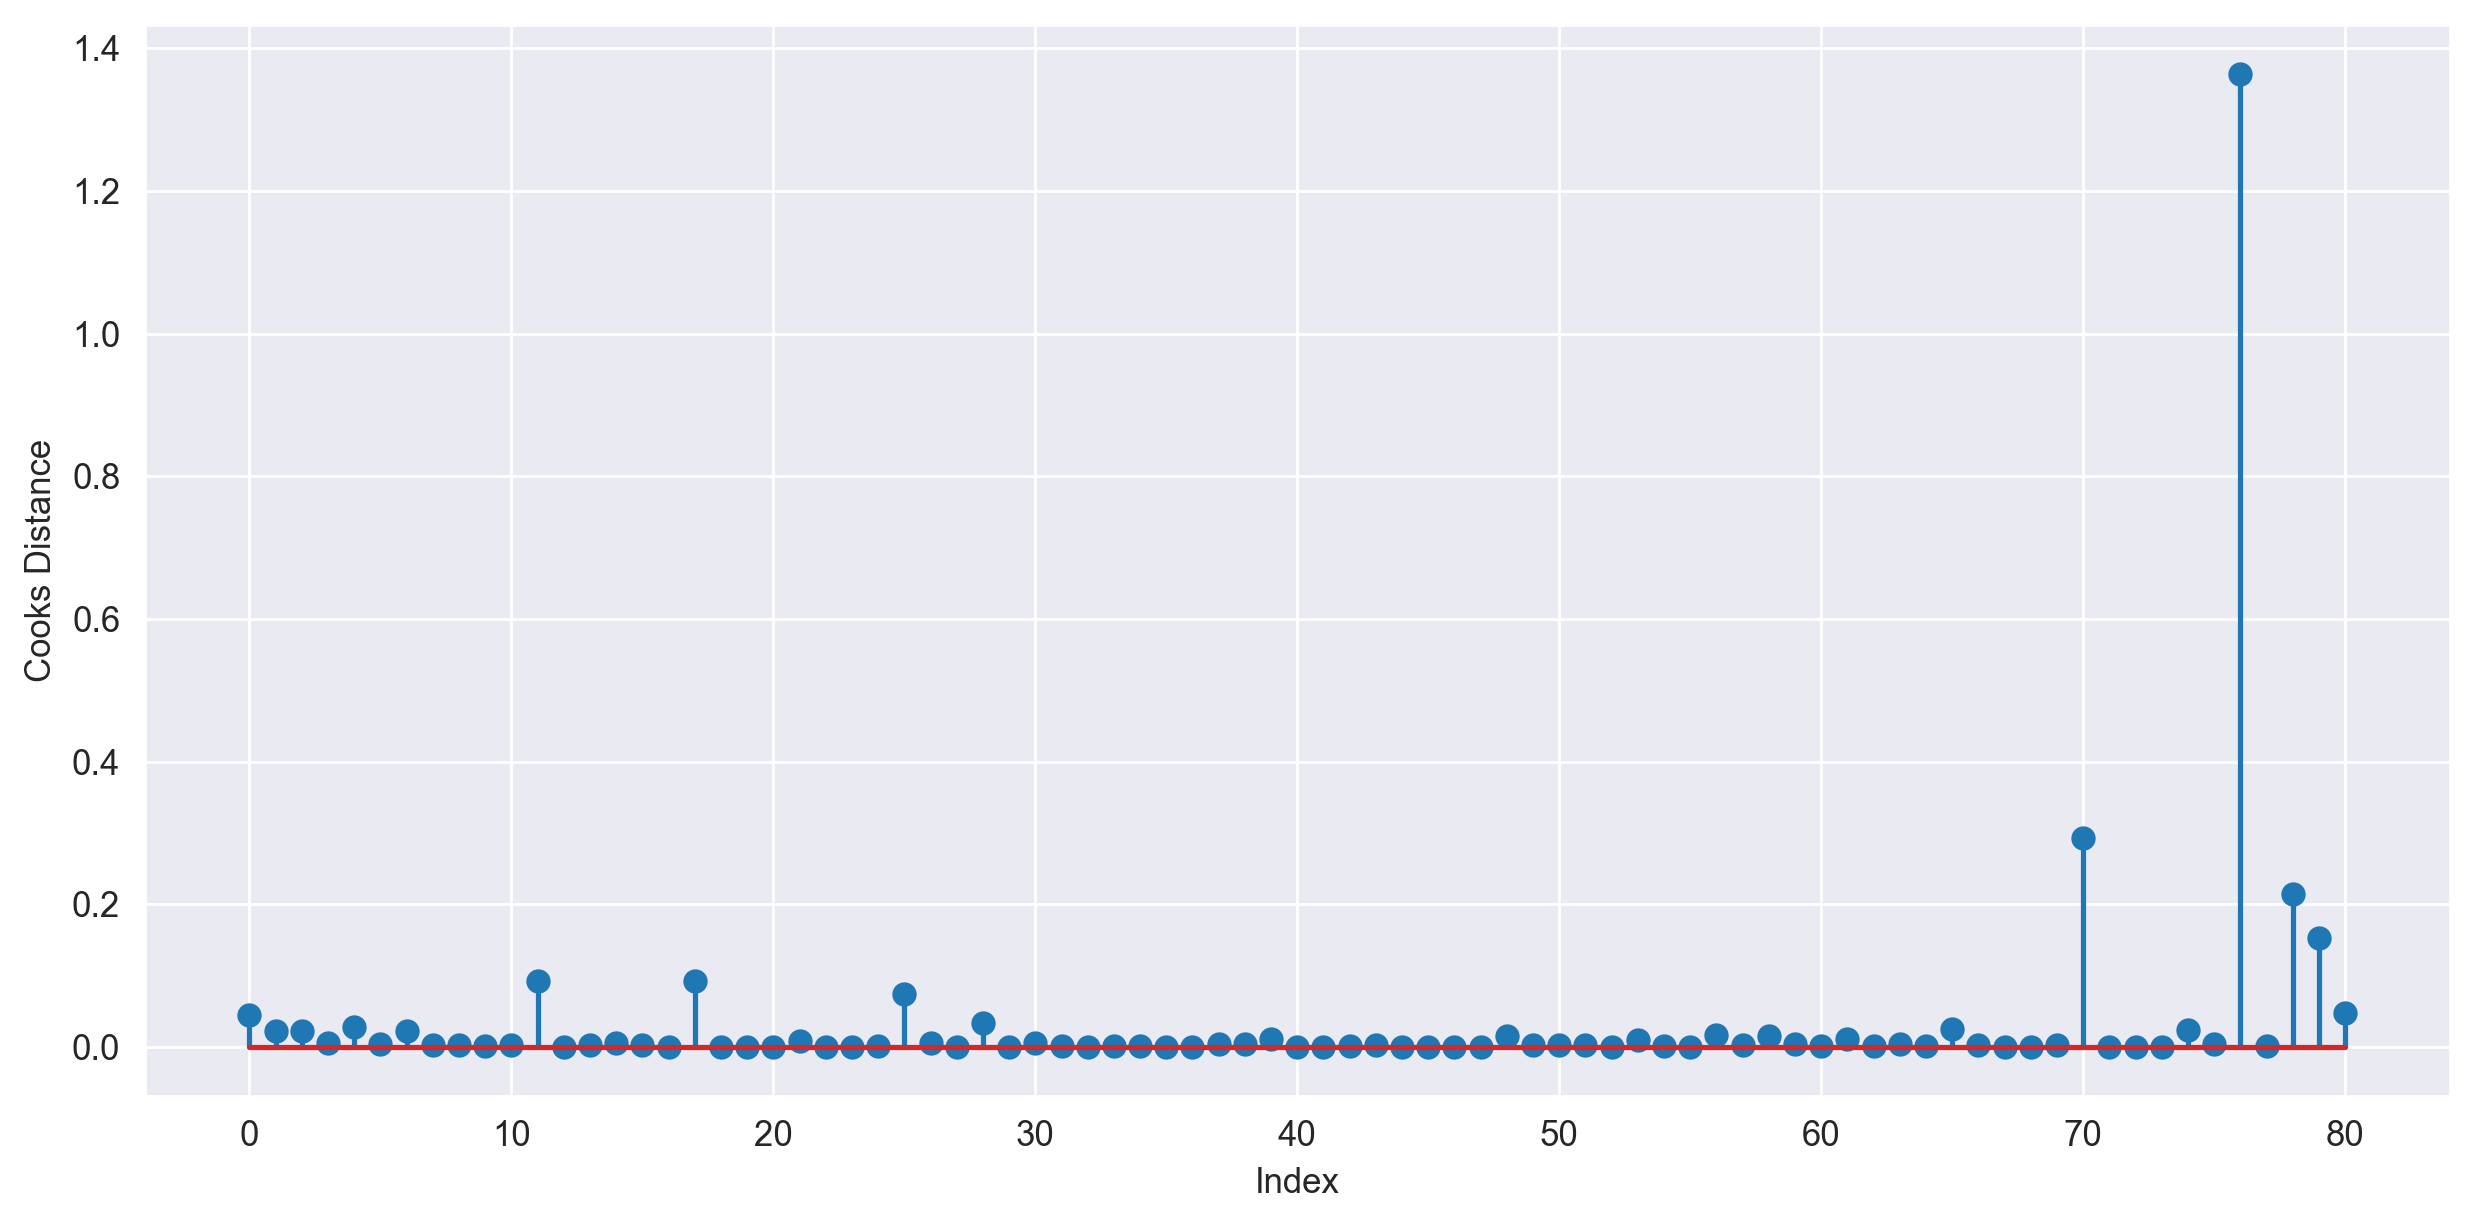

In [64]:
#Cook Distance Plot (Stem Graph)
plt.stem(c)
plt.xlabel("Index")
plt.ylabel("Cooks Distance")
plt.tight_layout()
plt.show()

In [65]:
np.argmax(c), np.max(c)

(76, 1.364174386910329)

In [66]:
#Cook Distance >= 1 Infulence Data Point 

In [67]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [68]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [70]:
#Influence Plot (optional)
from statsmodels.graphics.regressionplots import influence_plot

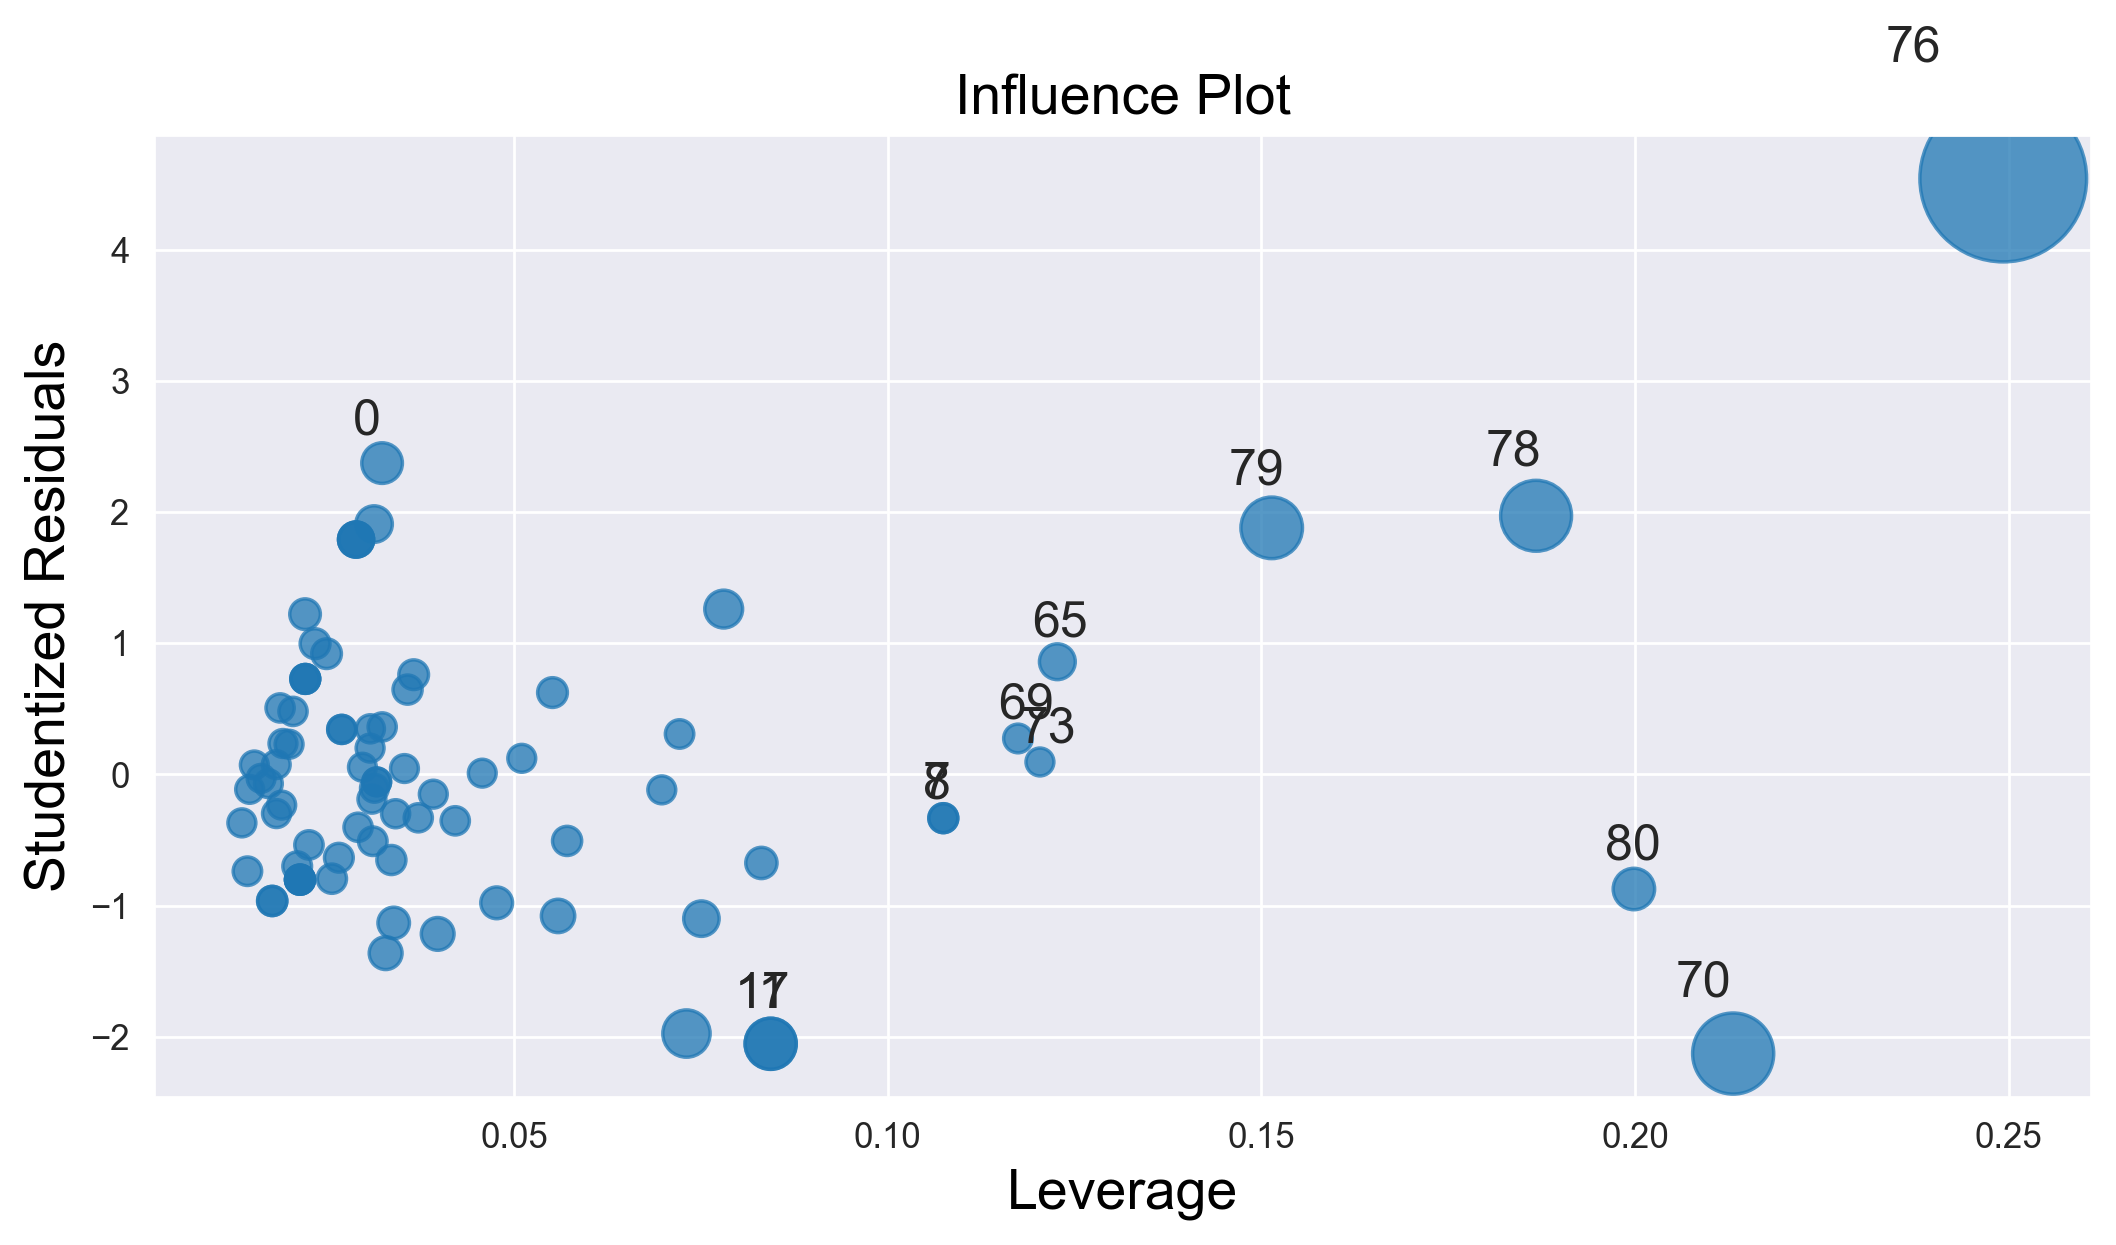

In [72]:
influence_plot(model);

In [73]:
#Calculate Cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.2222222222222222

In [74]:
# Any data present after 0.2222222222222222 in above infulence plot consider as Influence Data Point

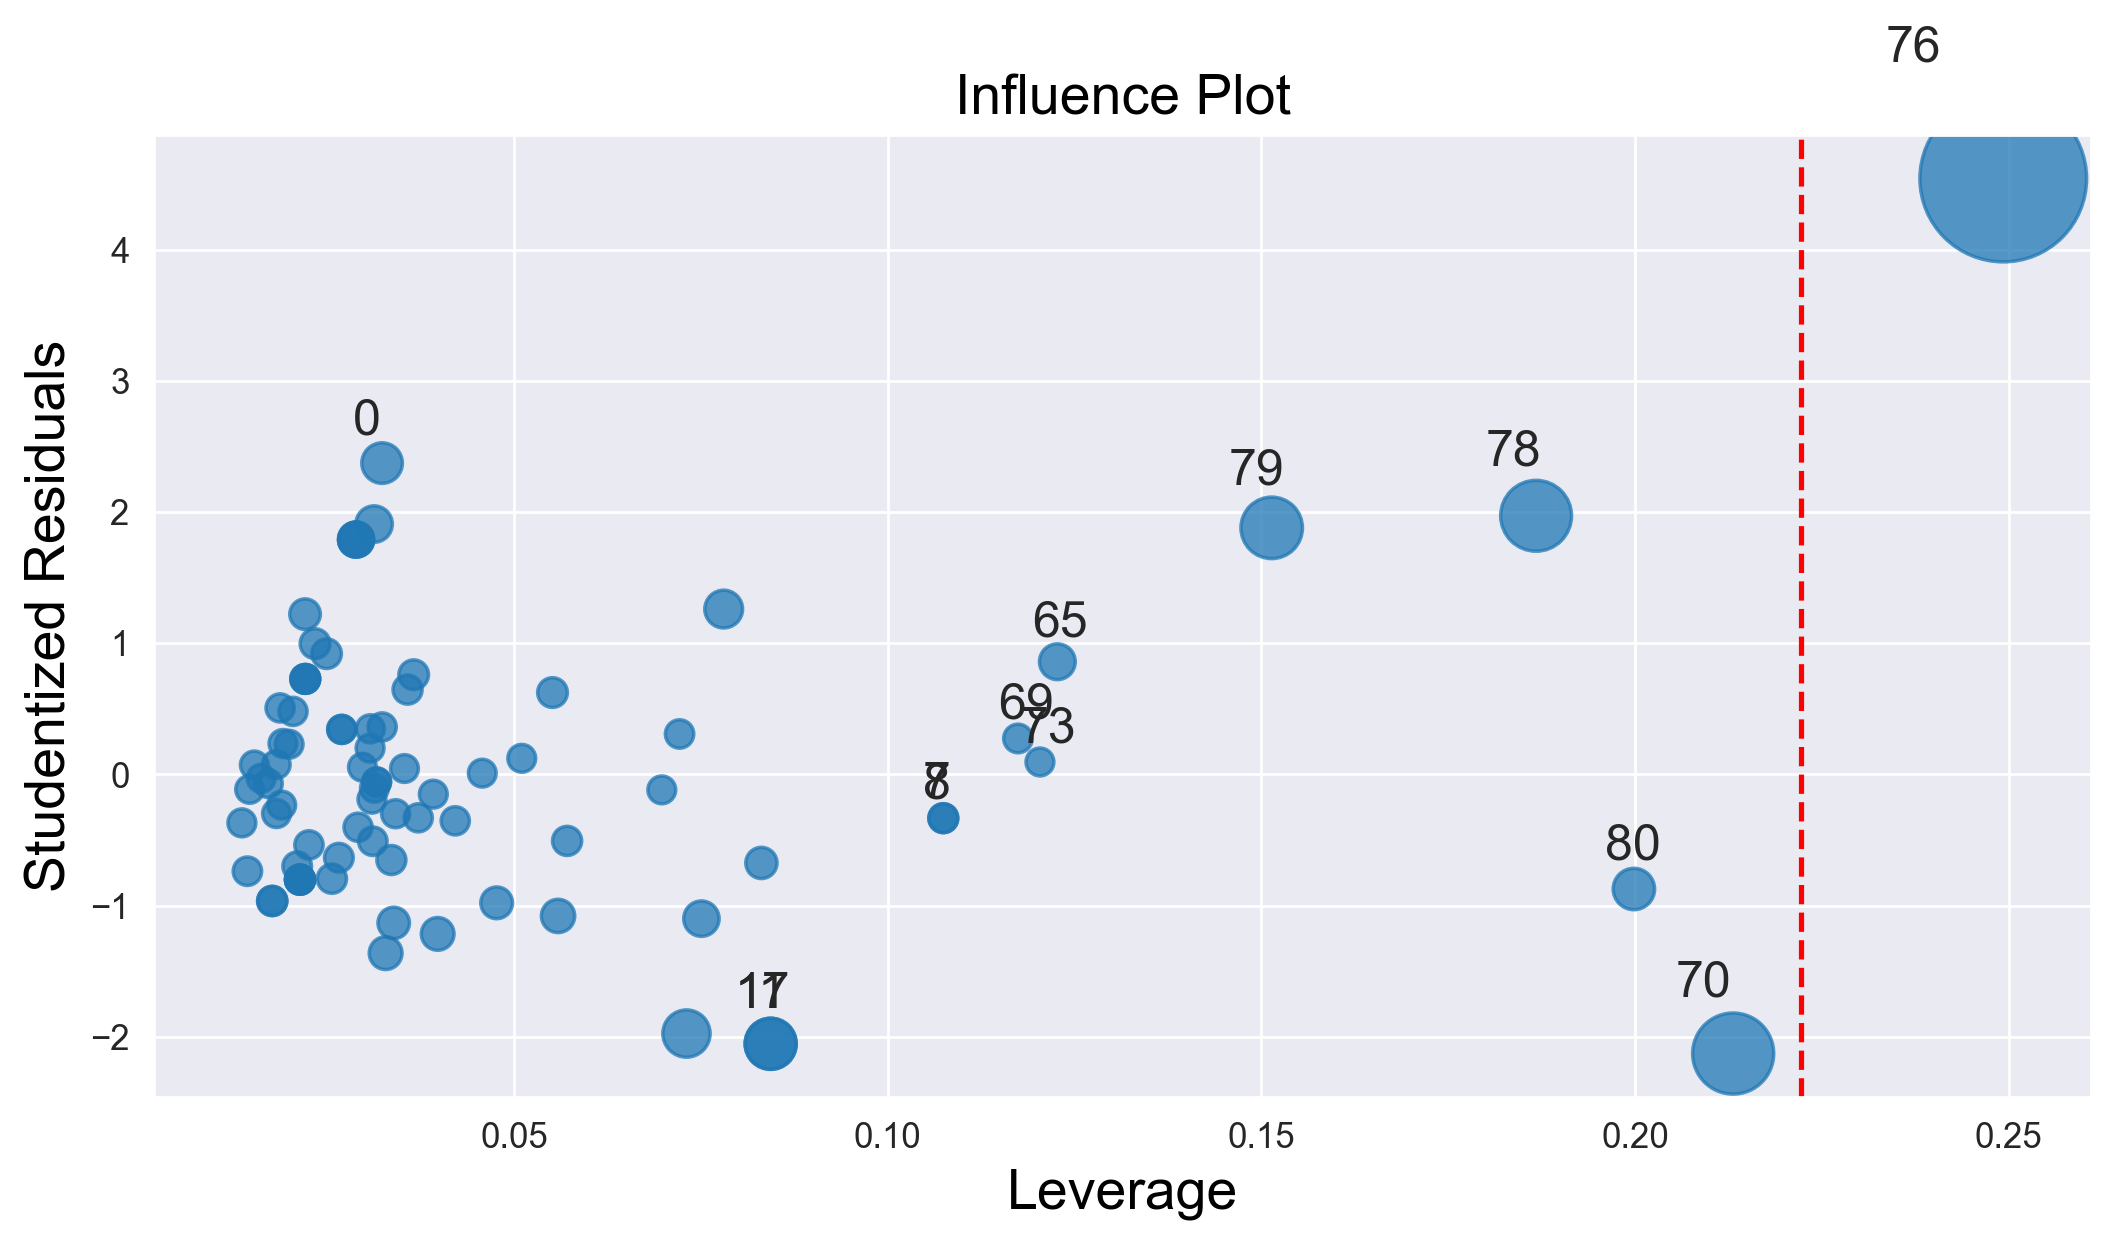

In [76]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')
plt.show()

#### Improving the Model

In [77]:
df.drop(index=76, inplace=True)

In [78]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [80]:
#reset the index
df.reset_index(inplace=True)

In [81]:
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [82]:
df.drop(columns='index', inplace=True)

In [83]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [84]:
# Buliding Final Model
finalmodel= smf.ols('MPG~HP+VOL+SP', data=df).fit()

In [85]:
finalmodel.rsquared

0.8192122305013384

#### Pridiction for NEW RECORD

In [86]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [87]:
test = pd.DataFrame({
    'HP' : [56,53.62,95],
    'VOL' : [92.6,85.63,75],
    'SP' : [110,112,150],
})

In [88]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [89]:
finalmodel.predict(test)

0    44.410251
1    46.979473
2    55.103295
dtype: float64